In [1]:
from xmitgcm import open_mdsdataset
import xmitgcm 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cmocean
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import ffmpeg
from matplotlib import animation

import MITgcmutils
import math
import netCDF4 as nc
from scipy.io import savemat
import scipy as sc
import scipy.io as sio
import warnings
import datetime
warnings.filterwarnings("ignore")

In [2]:
project='Spall/'

location='Files/' #'/Users/ameliaking/Proyecto/Codigo/Idealizada/ChangeDim/'

var='state'

ds=xr.open_dataset(str(location) + str(project) + str(var) + '.nc')
   

In [3]:
ds

<xarray.Dataset>
Dimensions:  (Xp1: 21, Y: 120, Z: 10, X: 20, Yp1: 121, Zl: 10, T: 21)
Coordinates:
  * Xp1      (Xp1) float64 0.0 5e+03 1e+04 1.5e+04 ... 9e+04 9.5e+04 1e+05
  * Y        (Y) float64 2.5e+03 7.5e+03 1.25e+04 ... 5.925e+05 5.975e+05
  * Z        (Z) float64 -30.0 -90.0 -150.0 -210.0 ... -450.0 -510.0 -570.0
  * X        (X) float64 2.5e+03 7.5e+03 1.25e+04 ... 8.75e+04 9.25e+04 9.75e+04
  * Yp1      (Yp1) float64 0.0 5e+03 1e+04 1.5e+04 ... 5.9e+05 5.95e+05 6e+05
  * Zl       (Zl) float64 0.0 -60.0 -120.0 -180.0 ... -420.0 -480.0 -540.0
  * T        (T) float64 0.0 1.555e+07 3.11e+07 ... 2.799e+08 2.955e+08 3.11e+08
Data variables:
    iter     (T) int32 ...
    U        (T, Z, Y, Xp1) float32 ...
    V        (T, Z, Yp1, X) float32 ...
    Temp     (T, Z, Y, X) float32 ...
    S        (T, Z, Y, X) float32 ...
    Eta      (T, Y, X) float32 ...
    W        (T, Zl, Y, X) float32 ...
Attributes: (12/18)
    MITgcm_version:  checkpoint69b
    build_user:      amelia.th
    build_host:      tsunami.cicese.mx
    build_date:      ons dec  4 16:37:16 PST 2024
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             2
    nPy:             2
    Nx:              20
    Ny:              120
    Nr:              10

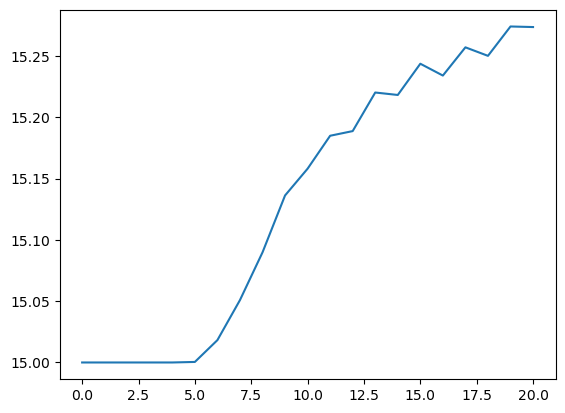

In [20]:
plt.plot(ds.Temp[:,0,0,10])


# Vertical crossection 

In [24]:
params = {'font.size': 15,
          'figure.figsize': (20, 10),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

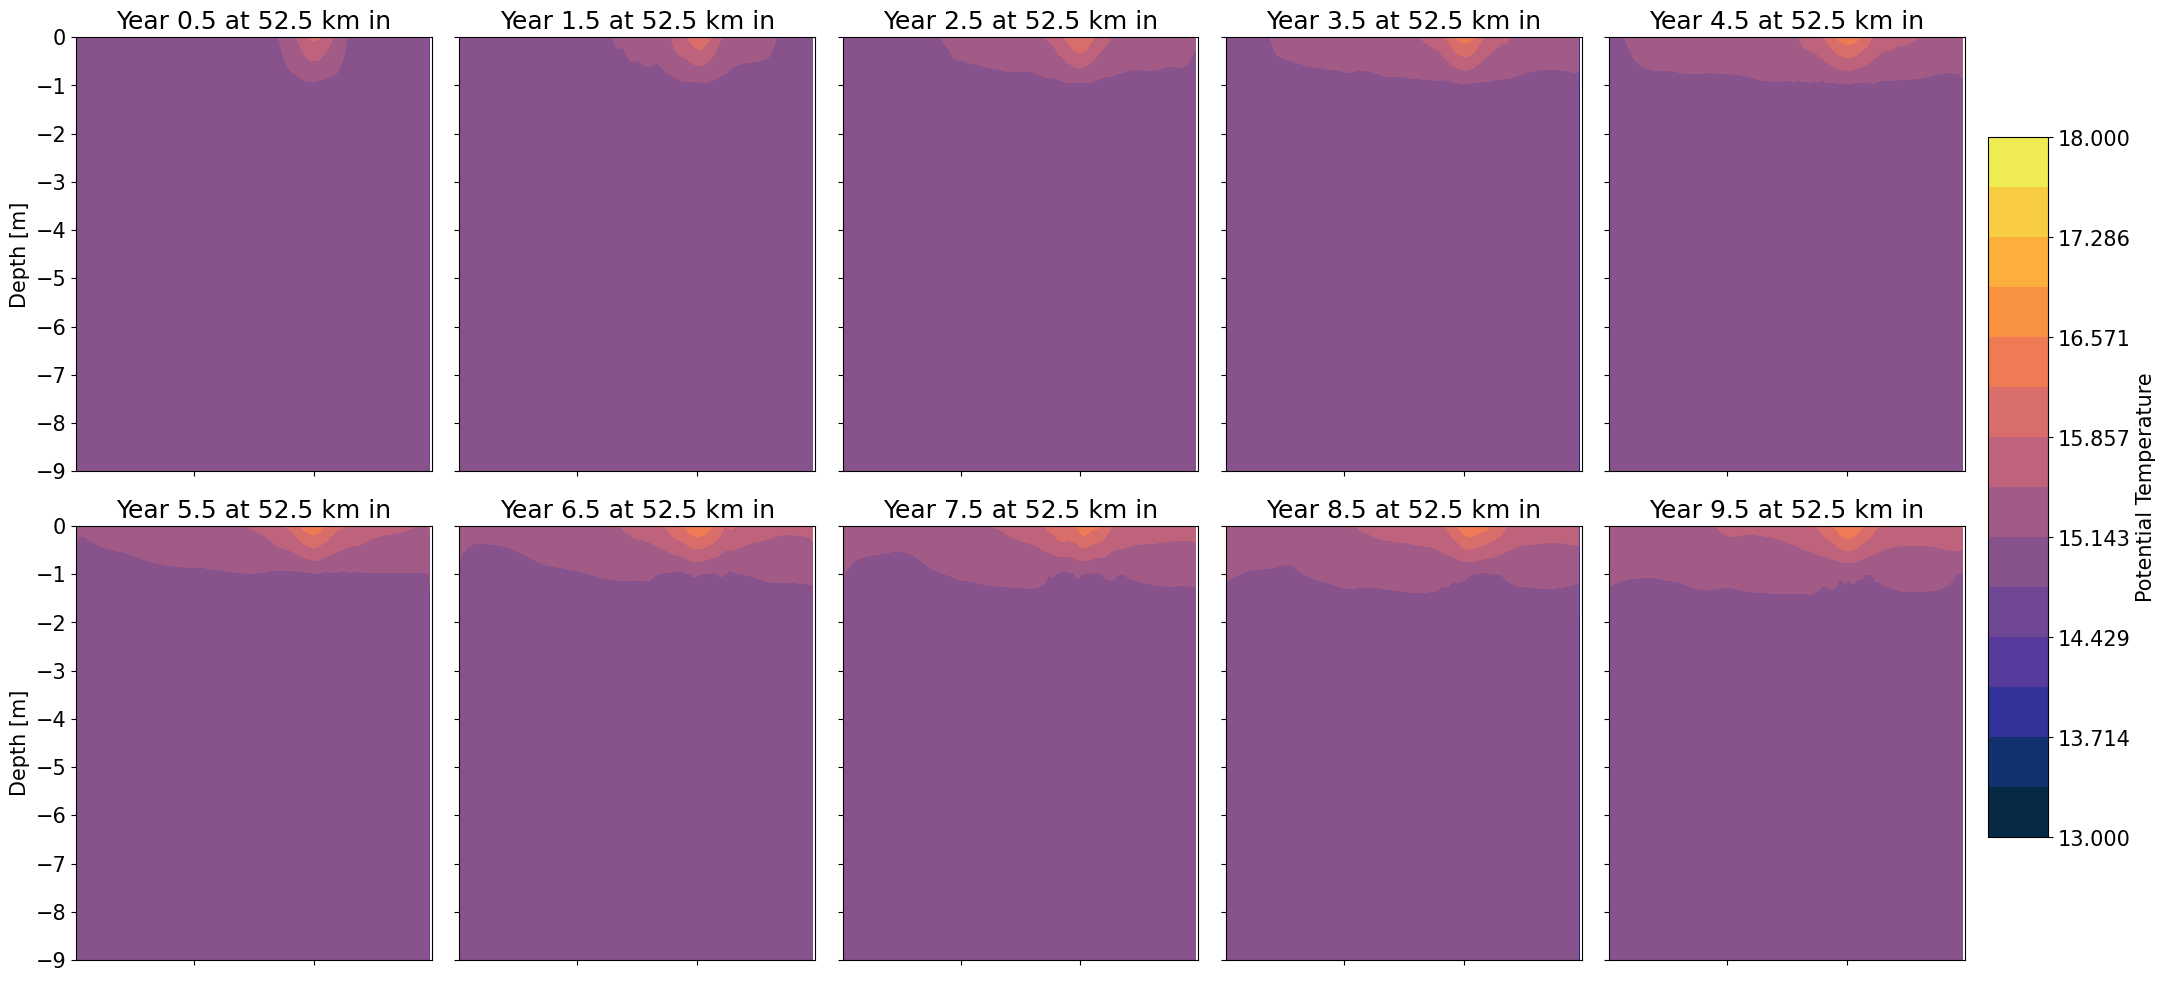

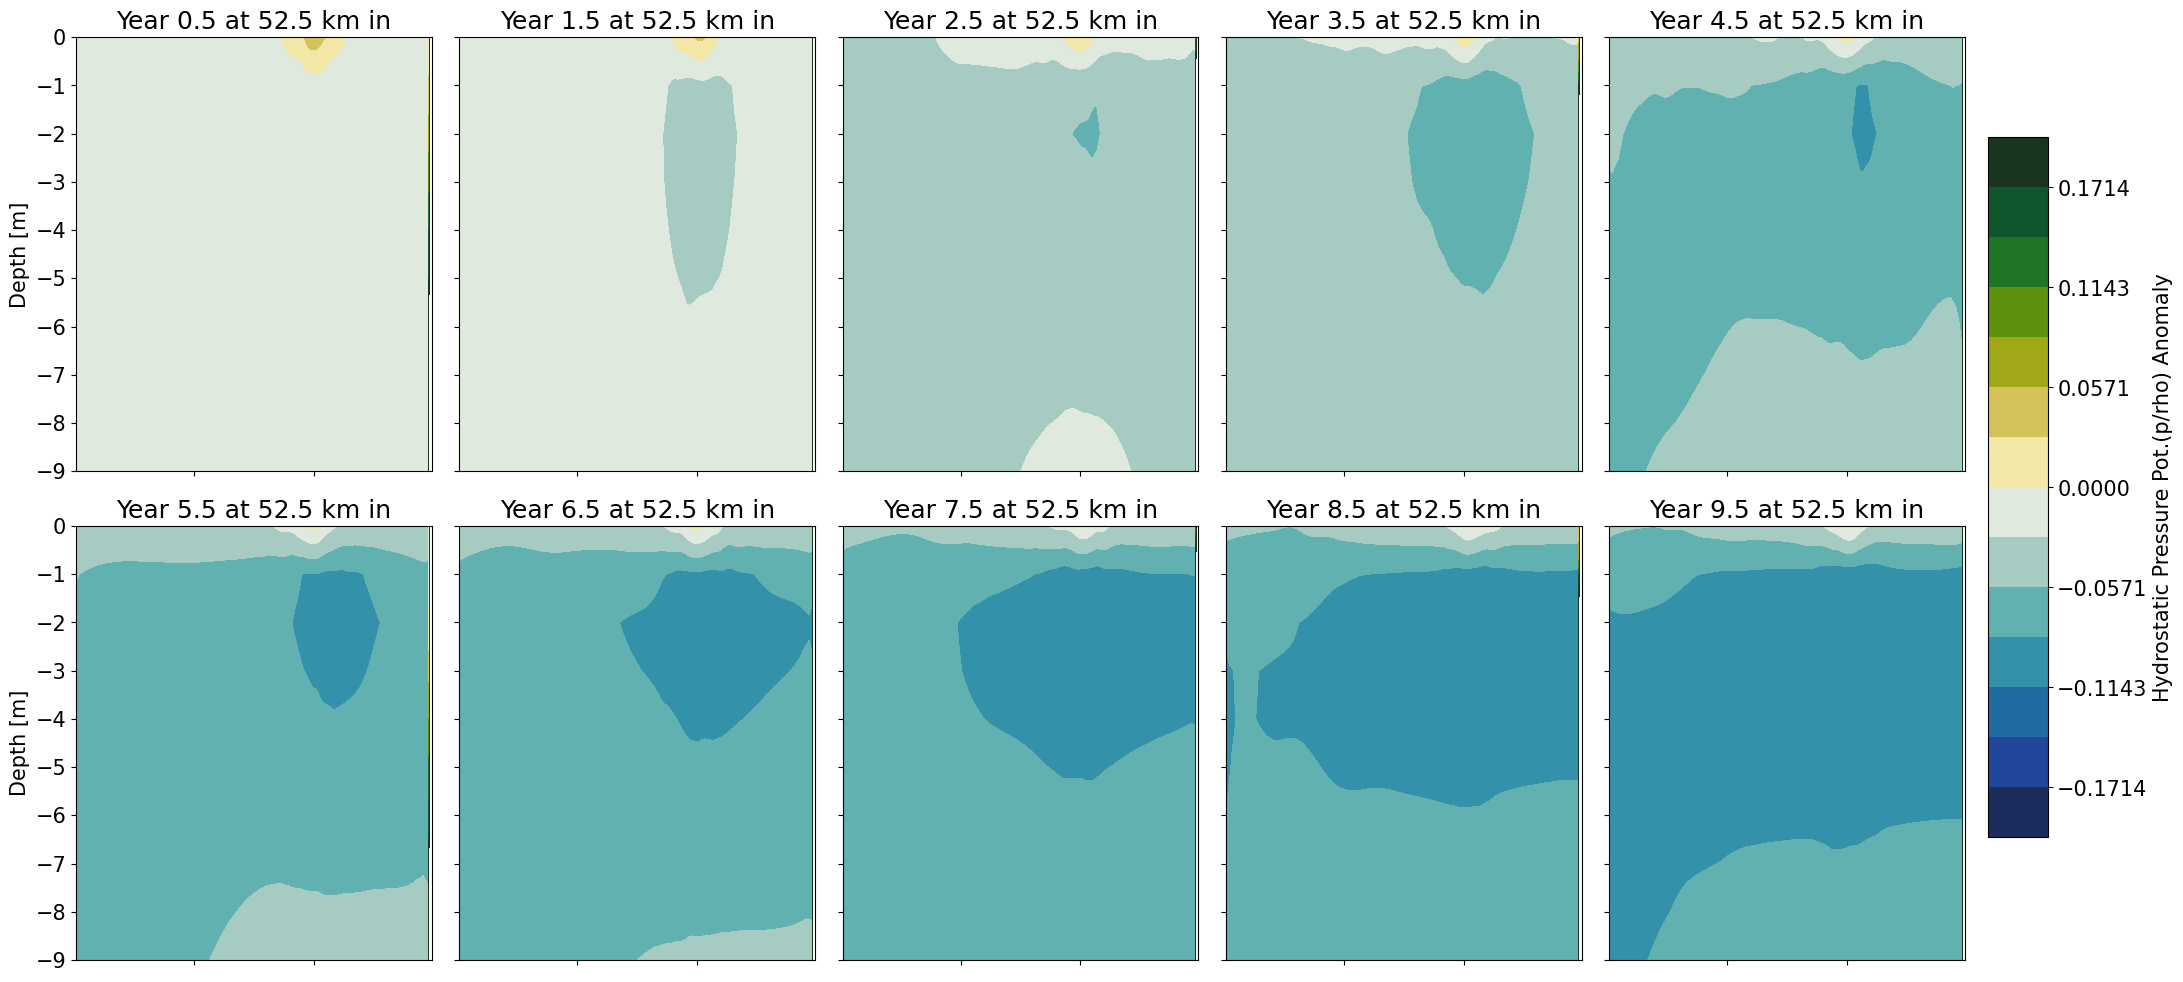

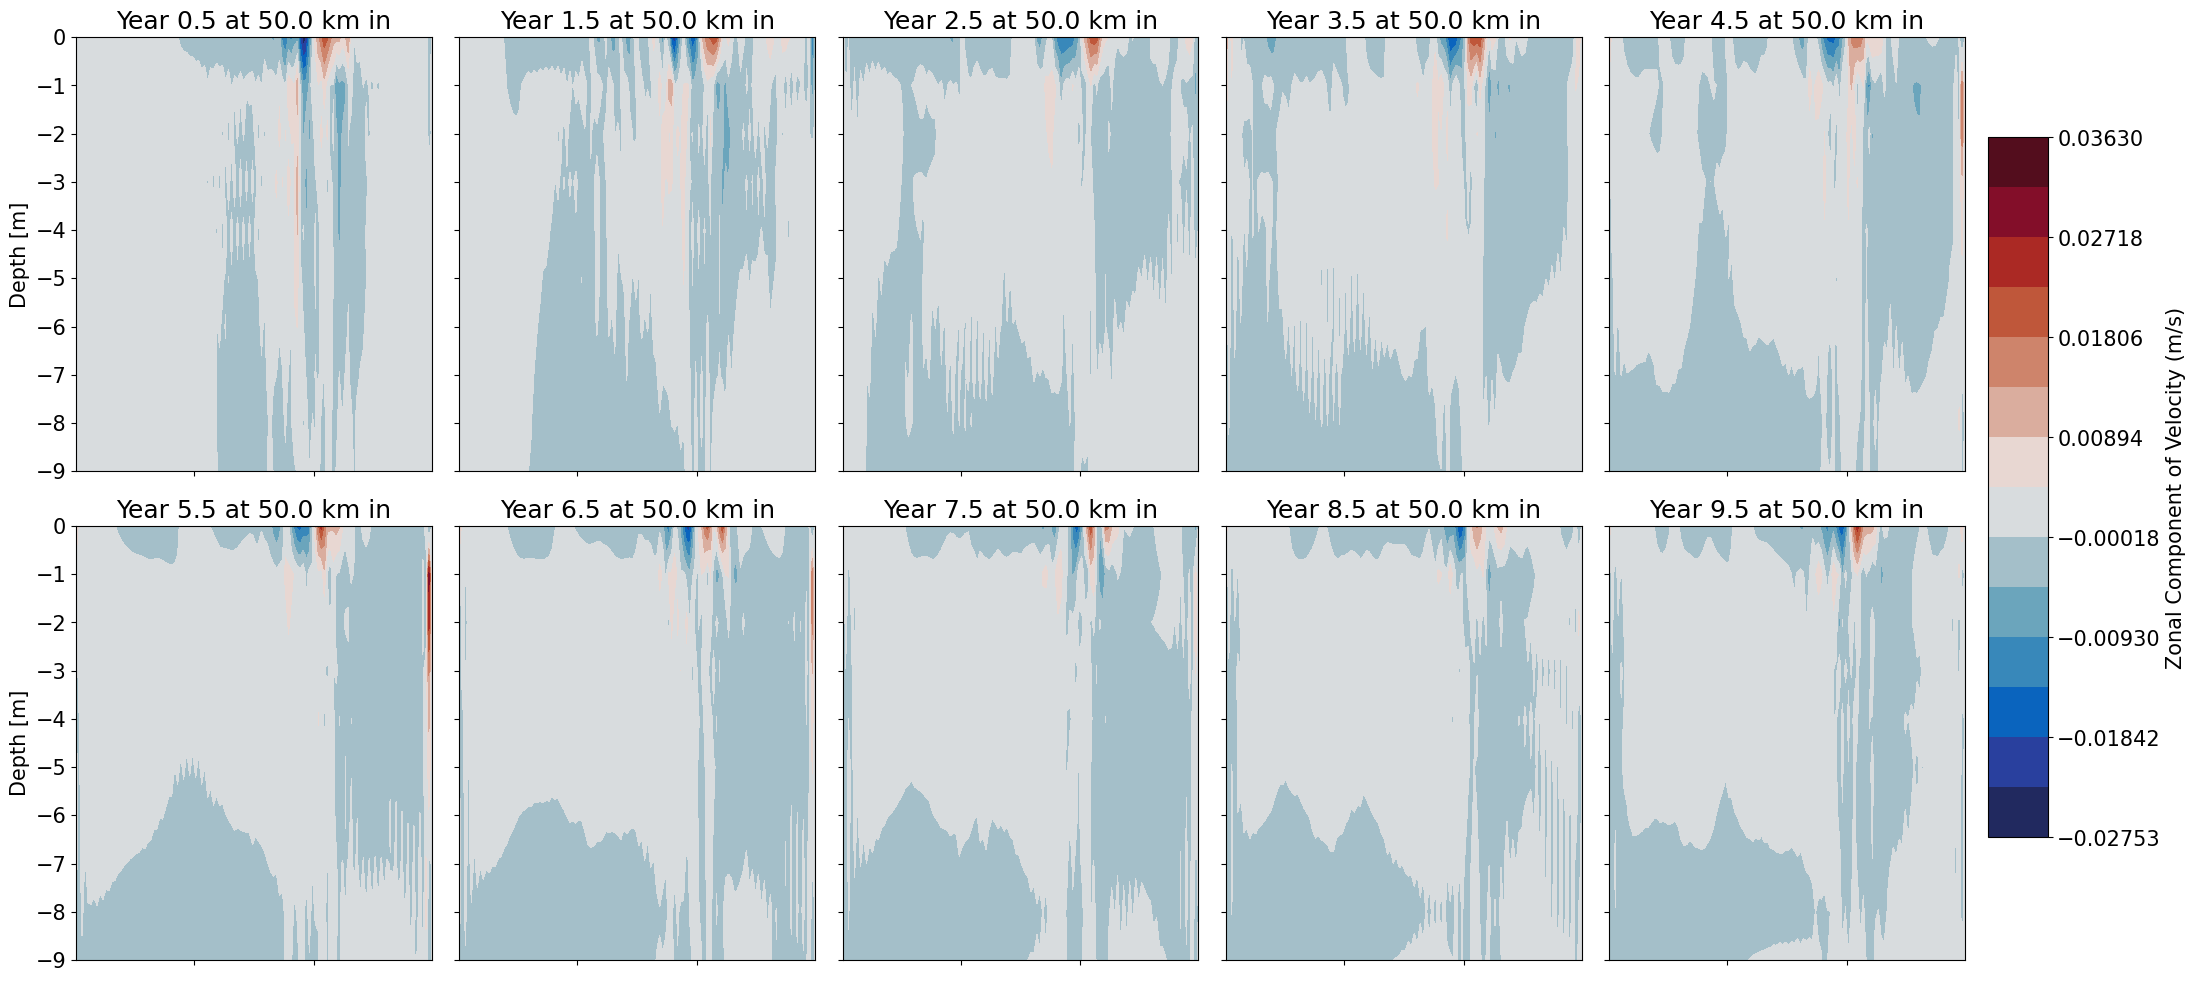

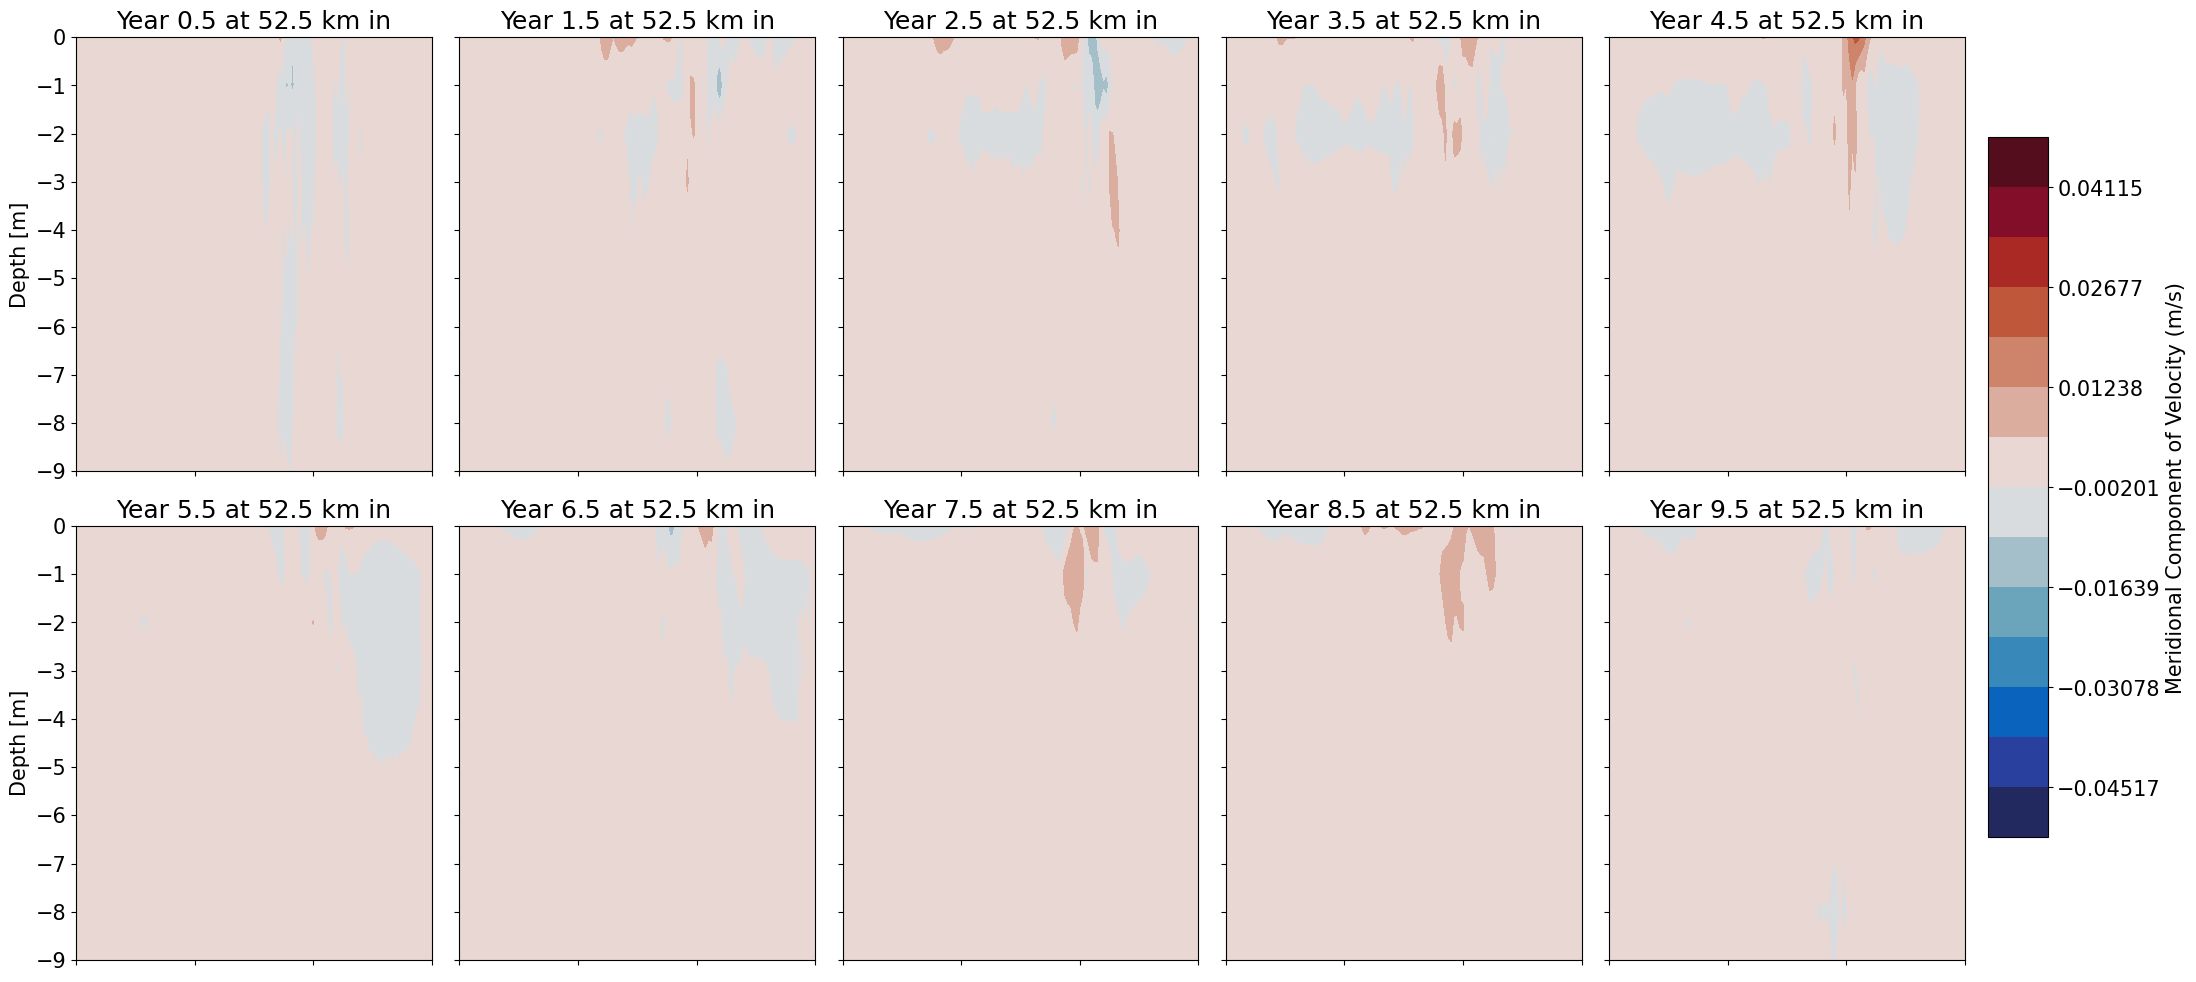

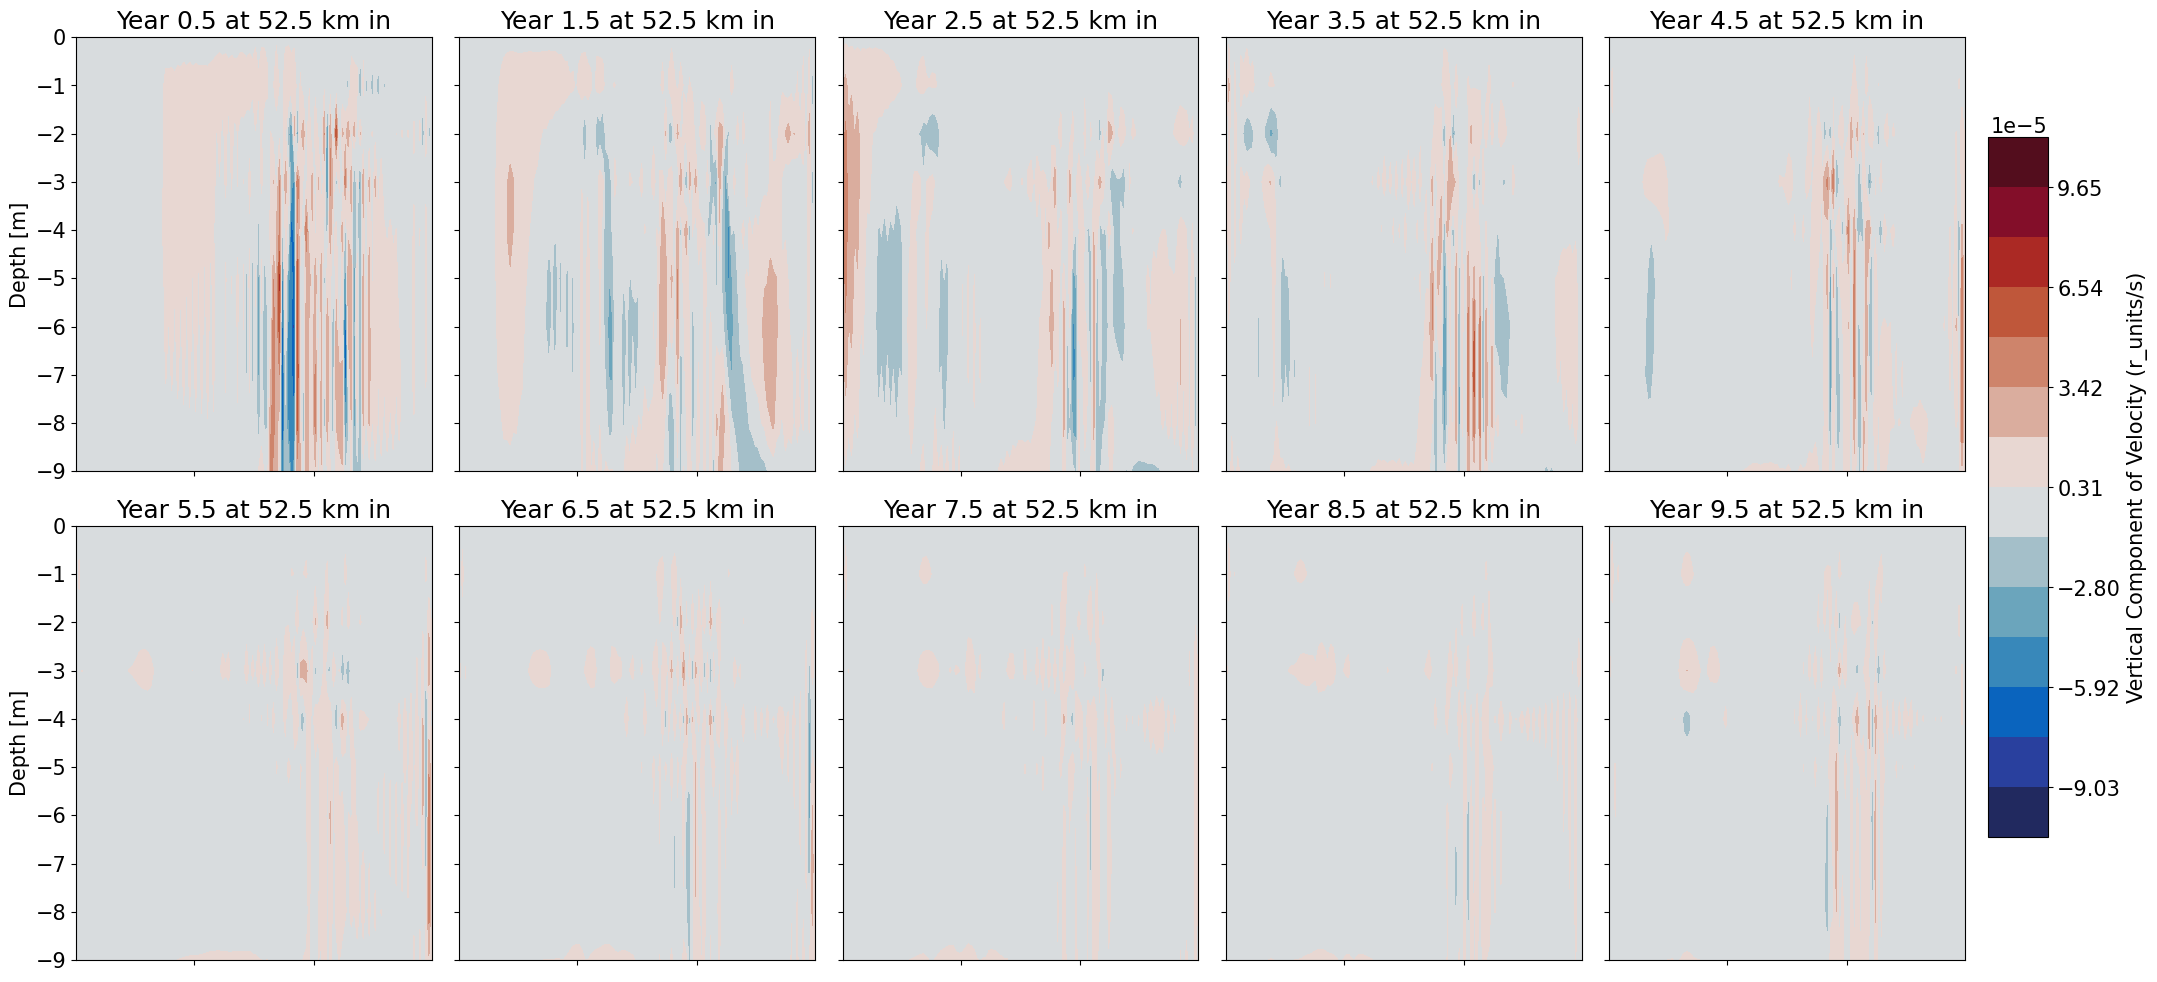

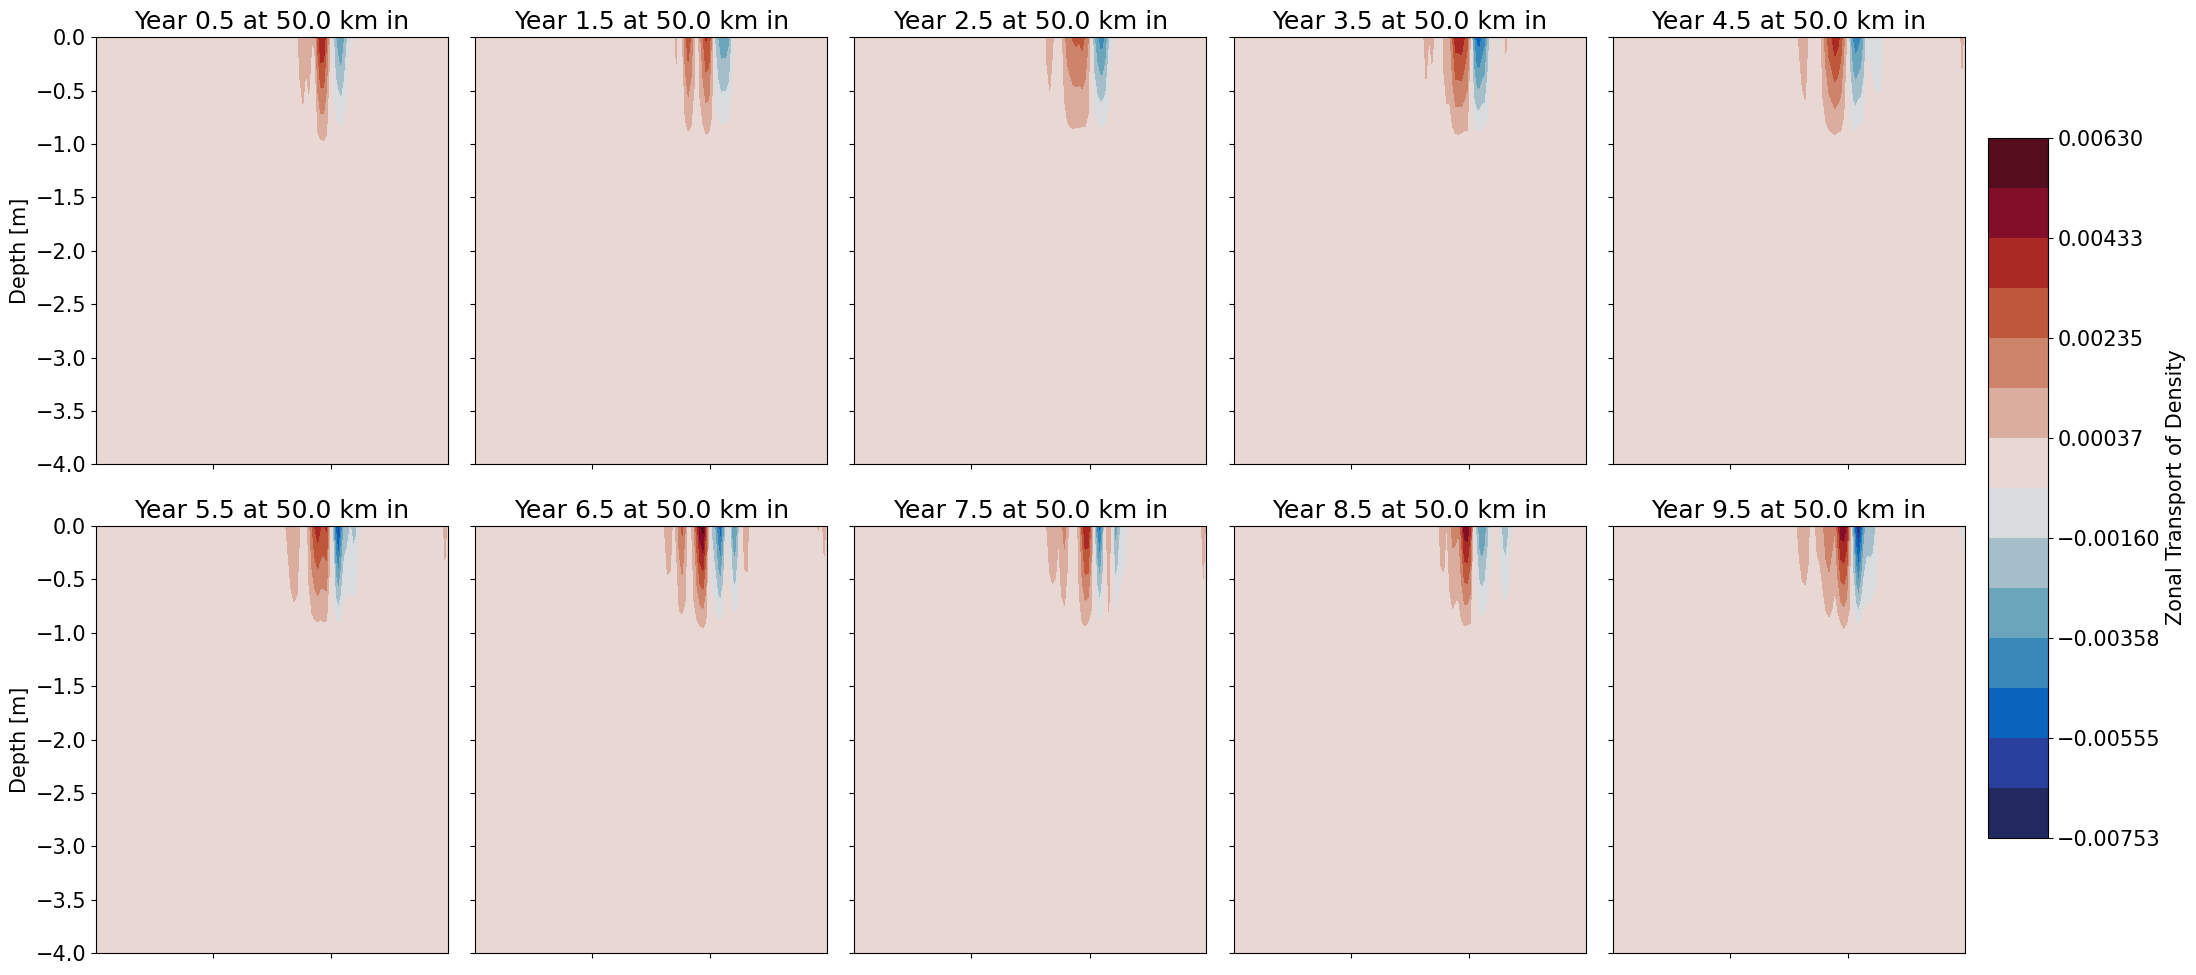

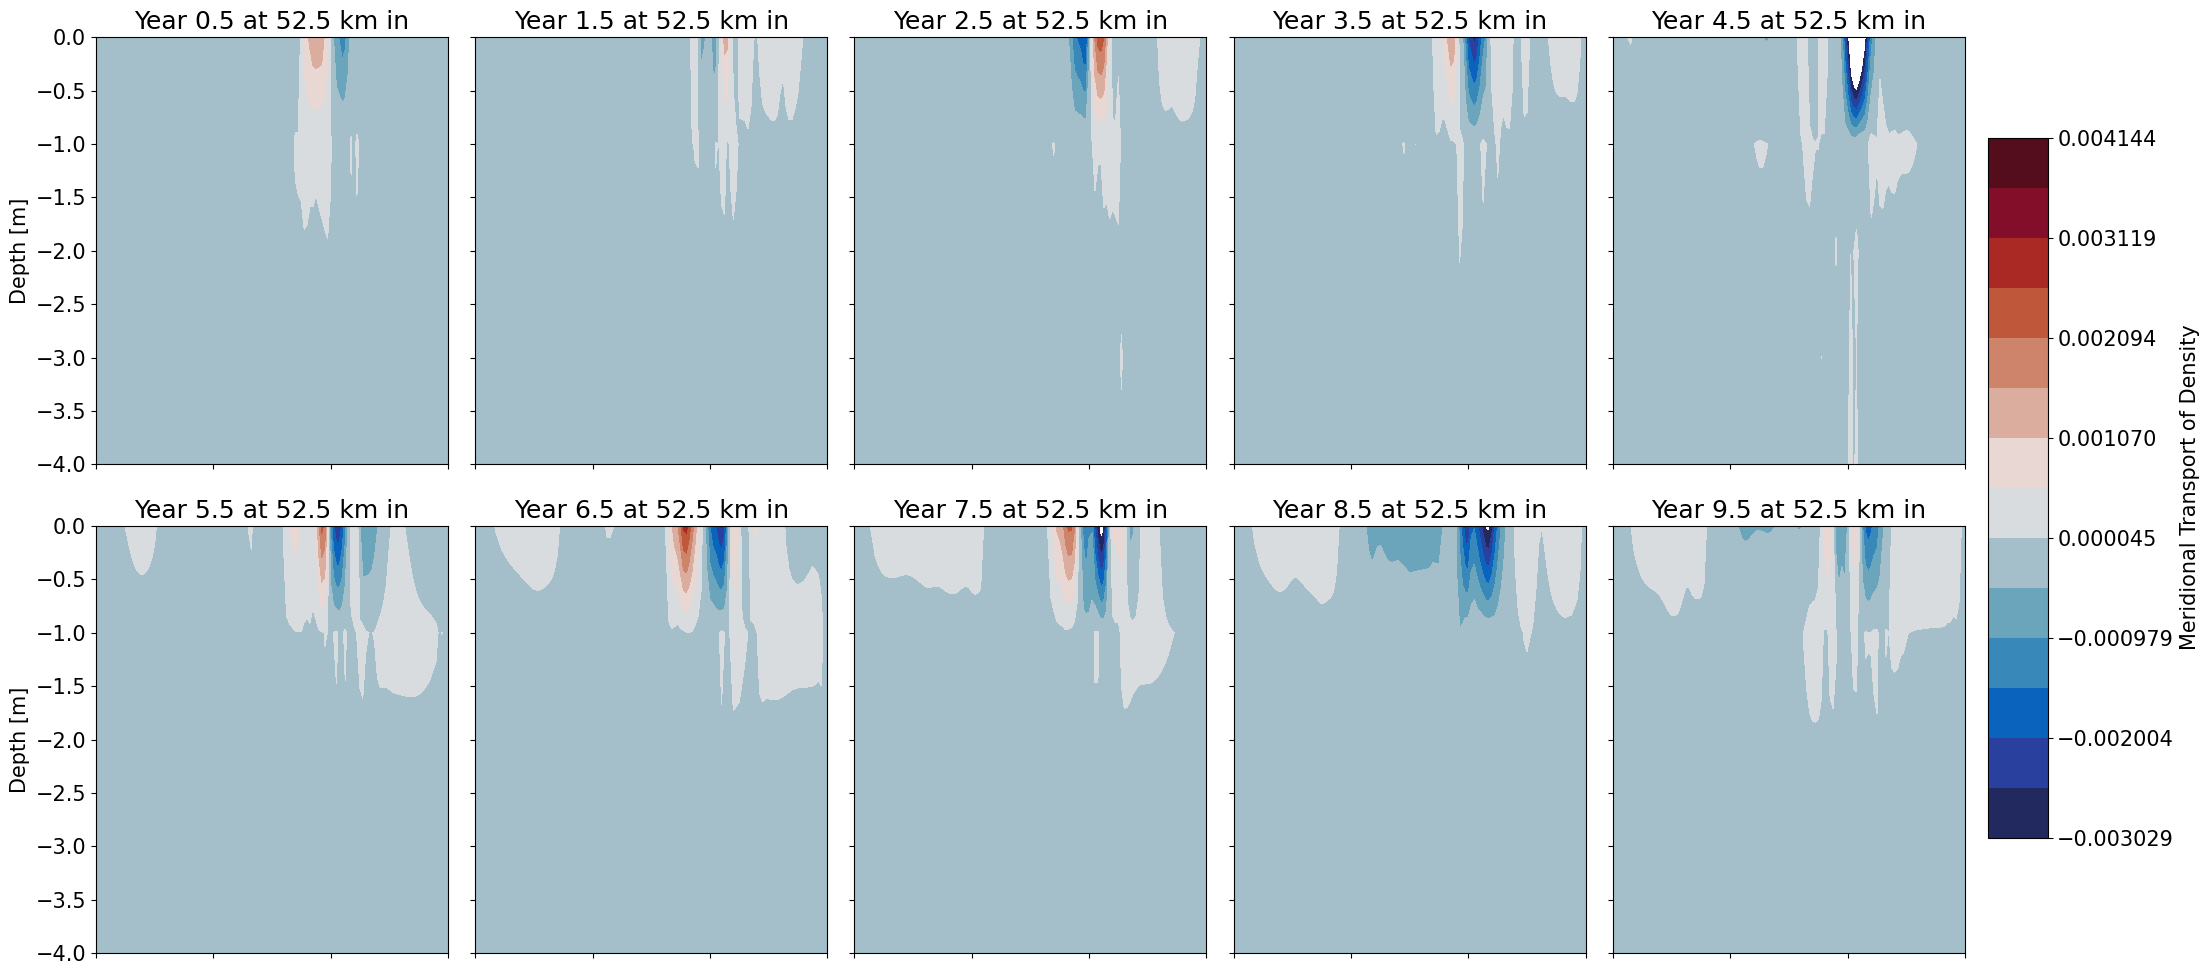

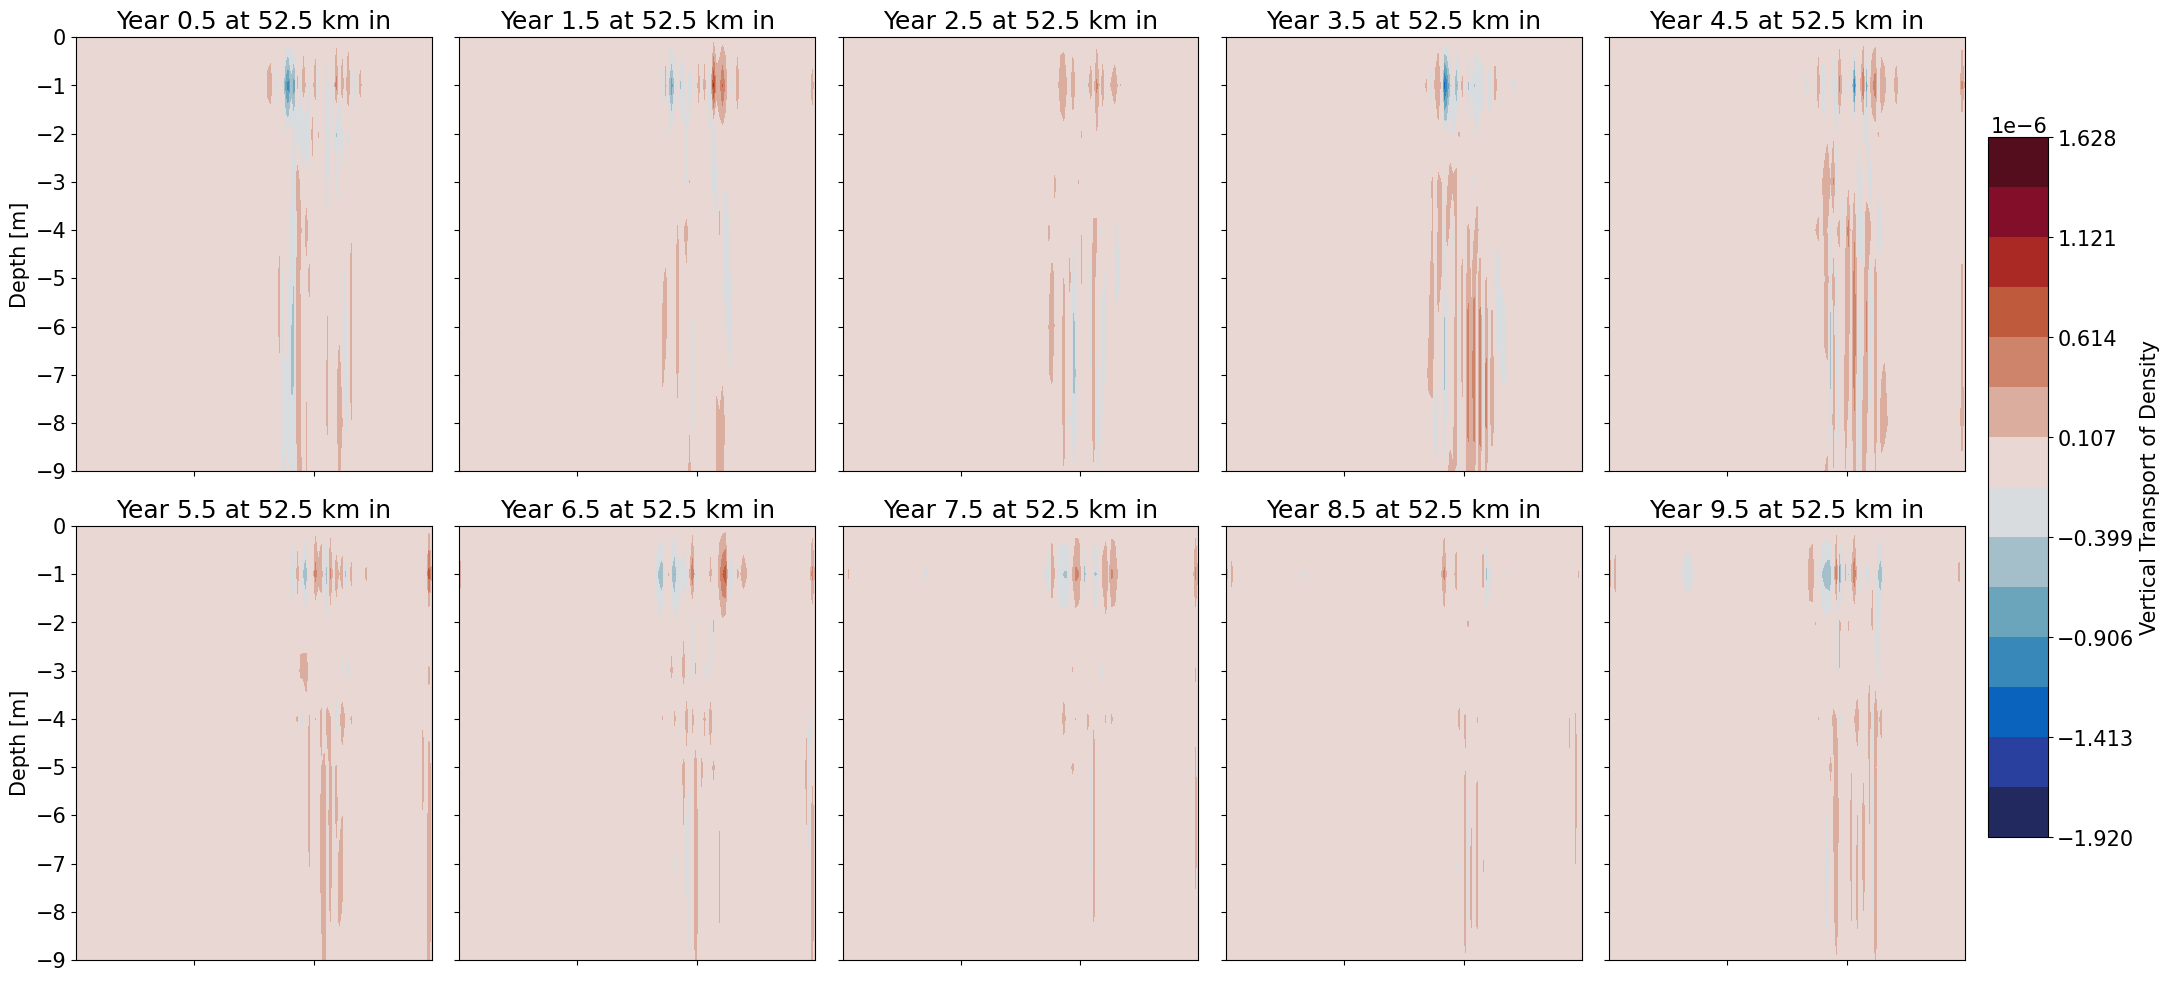

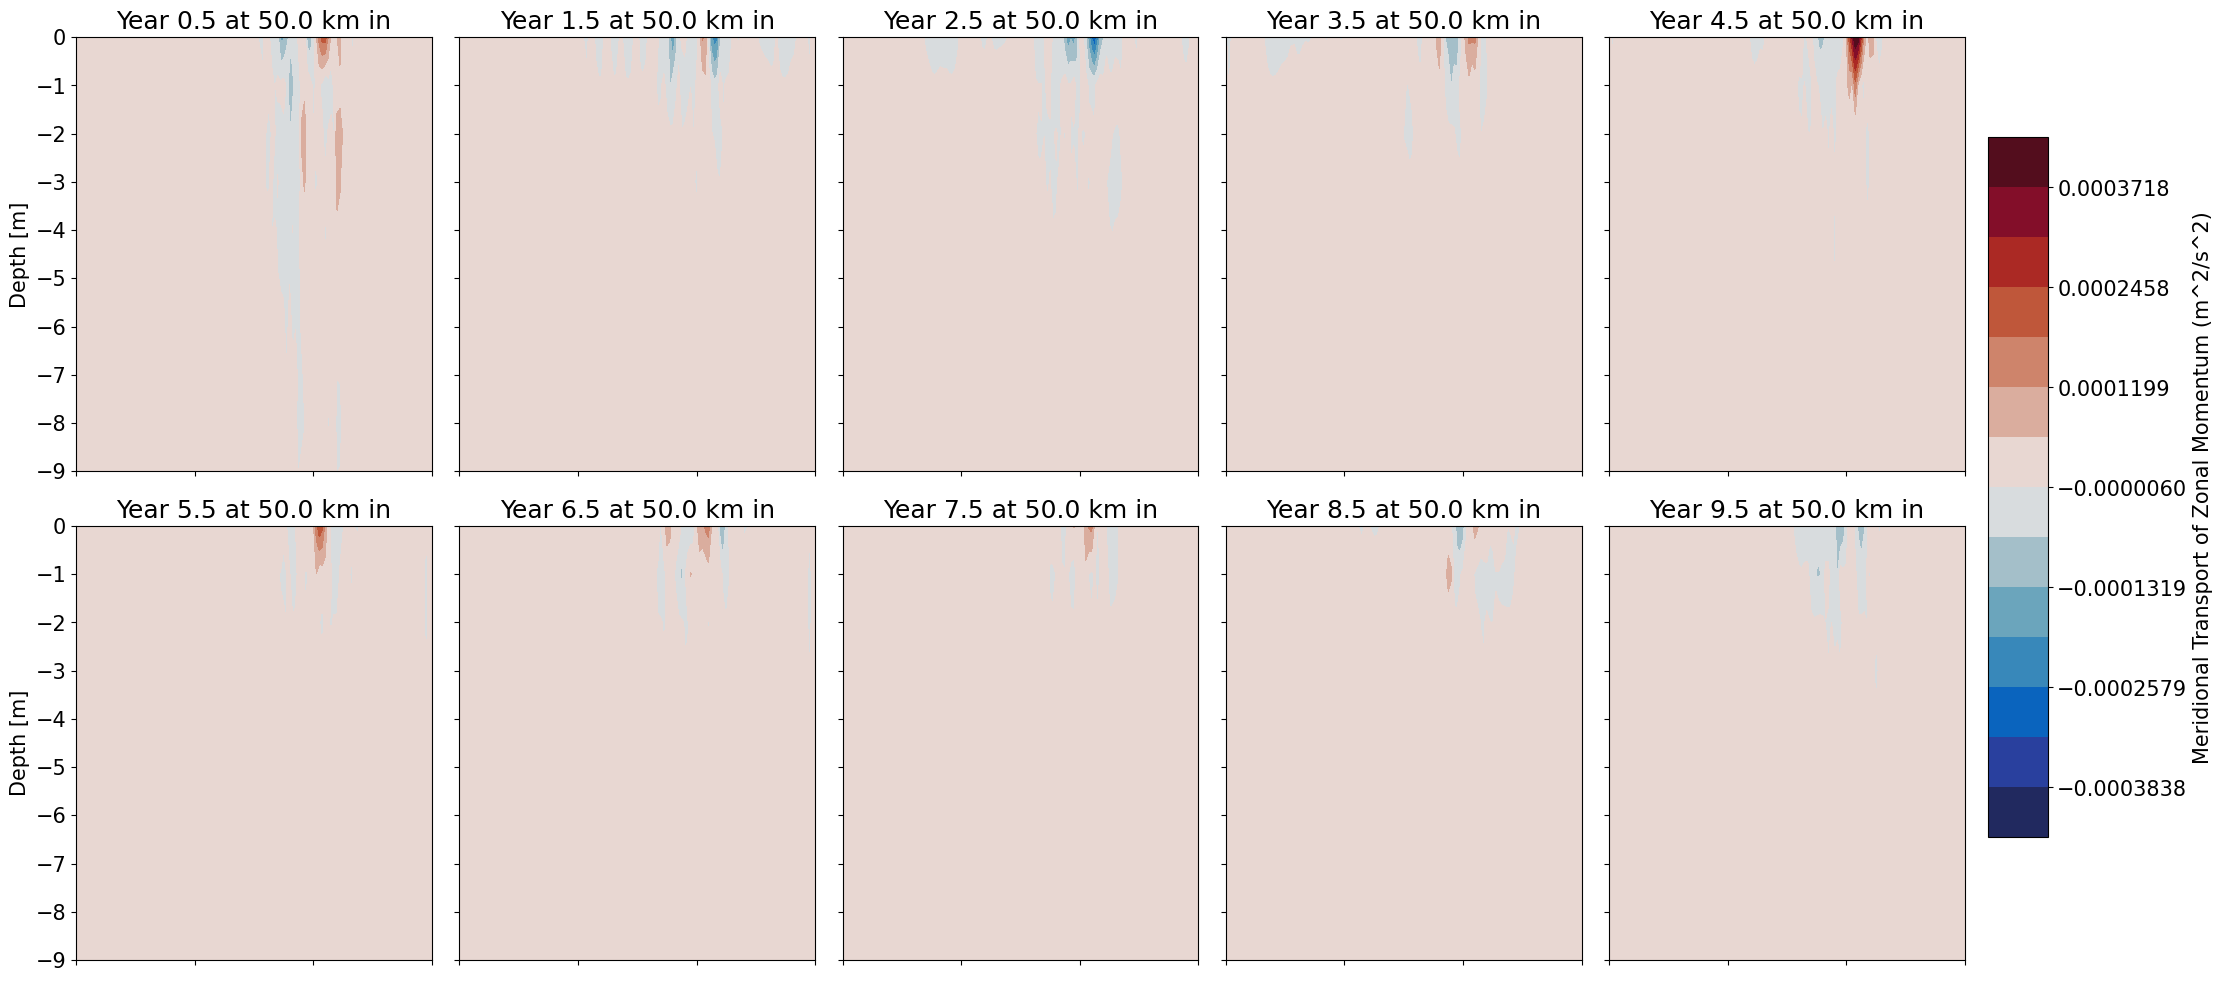

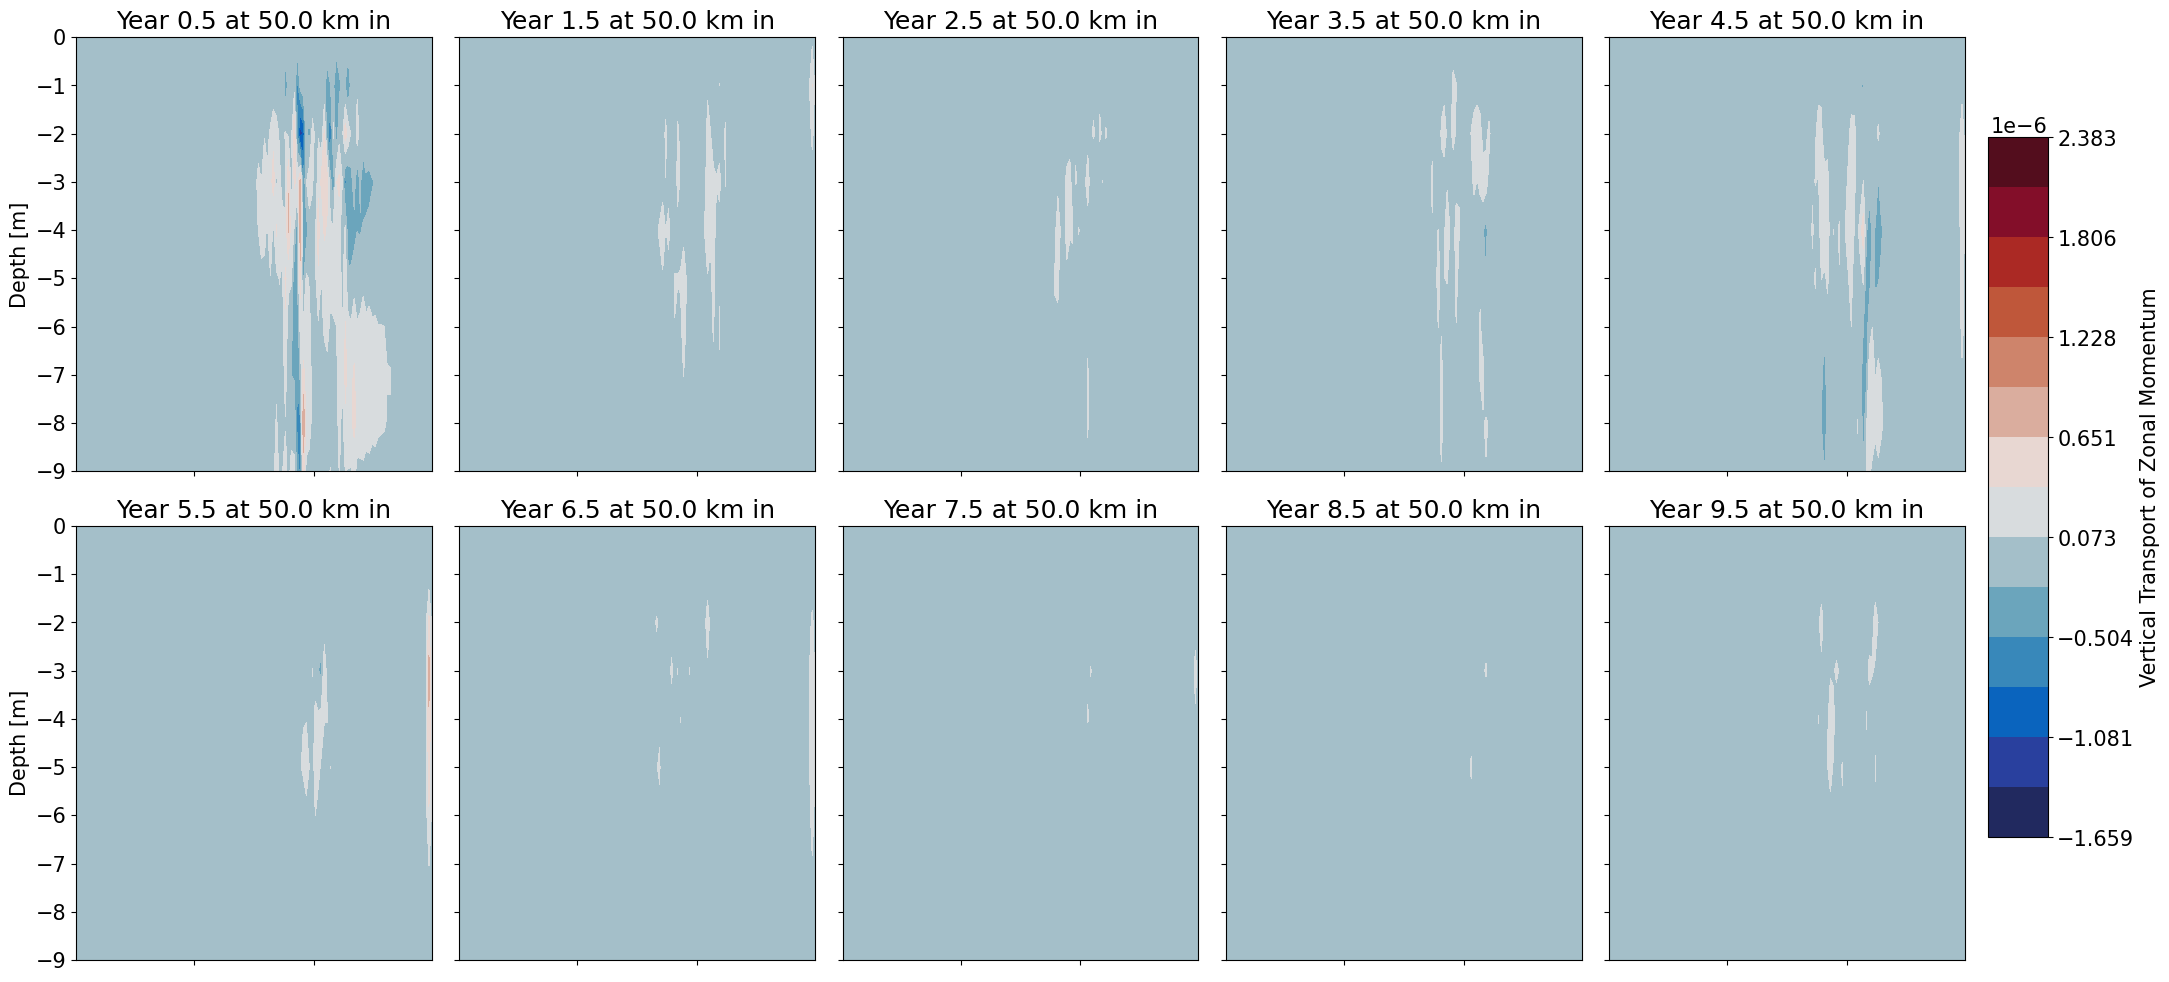

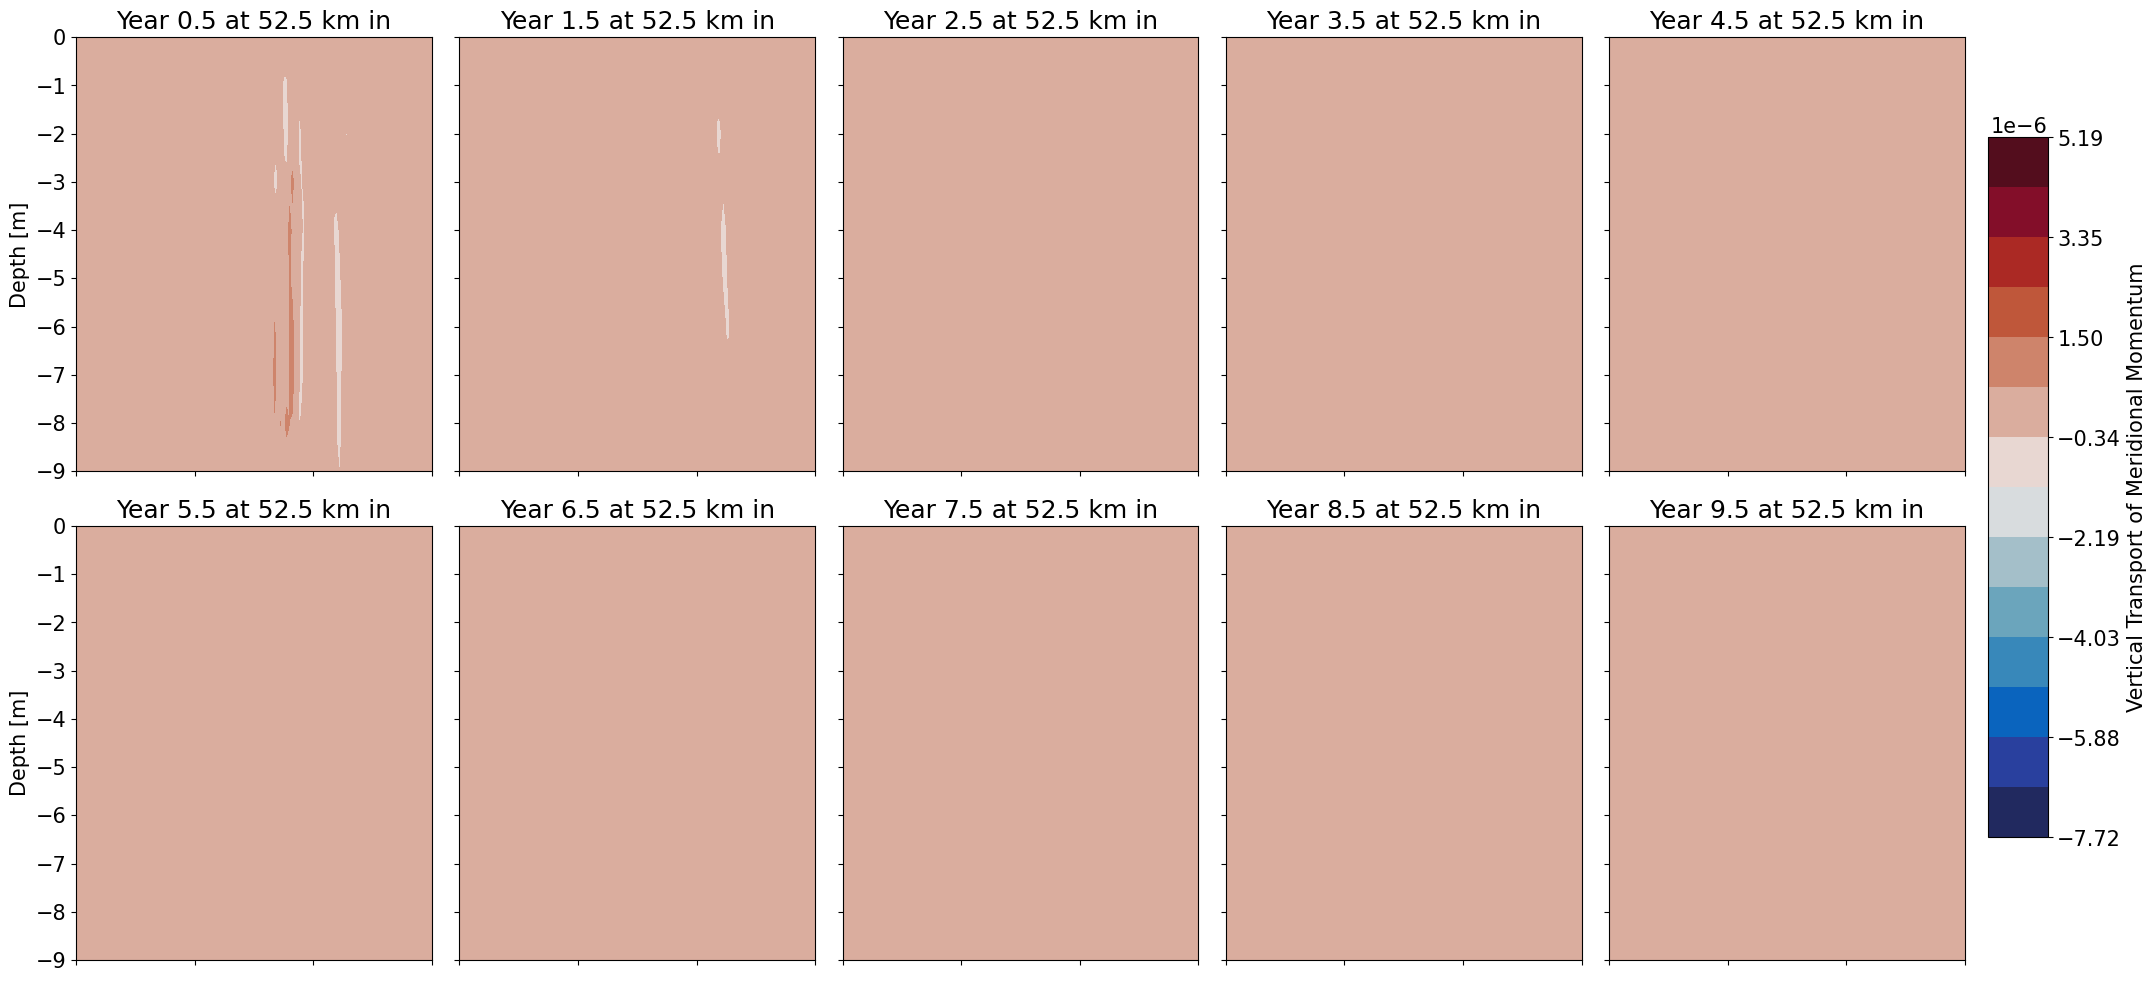

In [25]:
t=0

VARS=list(ds.keys())[2:]


for variable in VARS:

    exec(f'varin=ds.{variable}')
    title= varin.description 
    if variable == 'VVEL' or  variable == 'VRHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WV_VEL':
        Yin=ds.Yp1
    else:
        Yin=ds.Y
    if variable == 'UVEL' or  variable == 'URHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WU_VEL':
        Xin=ds.Xp1
    else:
        Xin=ds.X
    if variable == 'WU_VEL' or variable == 'WV_VEL' or  variable == 'WRHOMASS' or  variable == 'WVEL':
        Zin=-ds.Zld000010
    else:
        Zin=-ds.Zmd000010

    if variable == 'THETA':
        vmin=13
        vmax=18
        cmapi=cmocean.cm.thermal
    elif variable == 'PHIHYD':
        vmin=-0.2
        vmax=0.2
        cmapi=cmocean.cm.delta
    elif variable == 'WVEL' or variable == 'VRHOMASS'or  variable == 'WRHOMASS': 
        vmin=np.min(varin)/3
        vmax=np.max(varin)/3
        cmapi=cmocean.cm.balance
    else: 
        vmin=np.min(varin)
        vmax=np.max(varin)
        cmapi=cmocean.cm.balance

    levels=np.linspace(vmin,vmax,15)

    fig,ax=plt.subplots(2,5)

    for i in range(10):
        tin=t+(2*i)
        if i<=4:
            axin=ax[0,i]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>4,i<=9):
            axin=ax[1,i-5]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>7,i<=11):
            axin=ax[2,i-8]
            axin.set(xlabel='Distance [km]')
        if i==0 or i==10 or i==5 :
            axin.set(ylabel='Depth [m]')
        else: 
            axin.yaxis.set_tick_params(labelleft=False)


        timein=ds.T[tin]/(60*60*24)
        cax0=axin.contourf(Yin/1000, Zin , varin[tin,:,:,10],levels=levels,cmap=cmapi) 
        axin.set(title=f'Year {timein/360:.1f} at {Xin[10]/1000:.1f} km in')
        #plt.colorbar(cax0)
        if variable == 'URHOMASS' or variable == 'VRHOMASS':
            axin.set_ylim((-4,0))

    cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
    fig.colorbar(cax0, cax=cbar_ax)
    cbar_ax.set_ylabel(title)

    fig.tight_layout()

    fig.patch.set_alpha(0.0)
    plt.savefig('../Figures/' + str(project) + '/' + str(variable) + '.png', bbox_inches='tight')

IndexError: index 2 is out of bounds for axis 0 with size 2

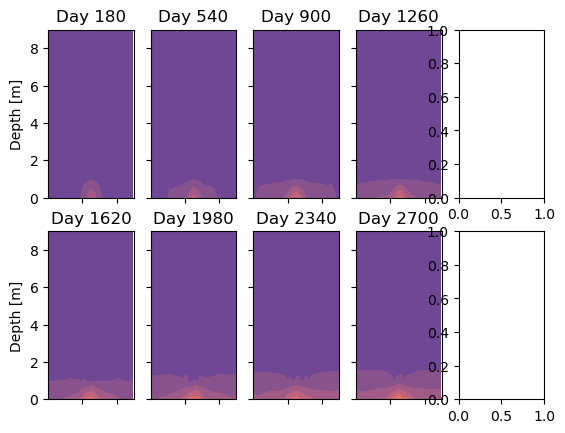

In [53]:
t=0

VARS=['Temp','Vvel','Uvel']

for variable in VARS:

    if variable == 'Vvel':
        varin=ds.V
        Yin=ds.Yp1
        vmin=-0.1
        vmax=0.1
        title= 'V-velocity [m/s]' #'Temperature [°C]'
        cmapi=cmocean.cm.balance
    elif variable == 'Temp':
        varin=ds.Temp
        title= 'Temperature [°C]'
        Yin=ds.Y
        cmapi=cmocean.cm.thermal
        vmin=13
        vmax=19
    elif variable == 'Sal':
        varin=ds.S
        title='Salinity [g/kg]'
        Yin=ds.Y
        cmapi=cmocean.cm.haline
        vmin=29
        vmax=33
    elif variable == 'Uvel':
        varin=ds.U
        Yin=ds.Y
        vmin=-0.14
        vmax=0.14
        title= 'U-velocity [m/s]' #'Temperature [°C]'


    levels=np.linspace(vmin,vmax,15)

    fig,ax=plt.subplots(3,4)

    for i in range(11):
        tin=t+(2*i)
        if i<=3:
            axin=ax[0,i]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>3,i<=7):
            axin=ax[1,i-4]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>7,i<=11):
            axin=ax[2,i-8]
            axin.set(xlabel='Distance [km]')
        if i==0 or i==8 or i==4 :
            axin.set(ylabel='Depth [m]')
        else: 
            axin.yaxis.set_tick_params(labelleft=False)


        timein=ds.T[tin]/(60*60*24)
        cax0=axin.contourf(Yin/1000, ds.Z, varin[tin,:,:,10],levels=levels,cmap=cmapi) 
        axin.set(title=f'Day {timein:.0f}')
        #plt.colorbar(cax0)

    cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
    fig.colorbar(cax0, cax=cbar_ax)
    cbar_ax.set_ylabel(title)

    fig.tight_layout()

    fig.patch.set_alpha(0.0)
    plt.savefig('../Figures/' + str(project) + '/' + str(variable) + '.png', bbox_inches='tight')

# OVERVIEW SURFACE

In [5]:
params = {'font.size': 15,
          'figure.figsize': (20, 20),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [139]:
VARS

['THETA',
 'PHIHYD',
 'UVEL',
 'VVEL',
 'WVEL',
 'URHOMASS',
 'VRHOMASS',
 'WRHOMASS',
 'UV_VEL_Z',
 'WU_VEL',
 'WV_VEL']

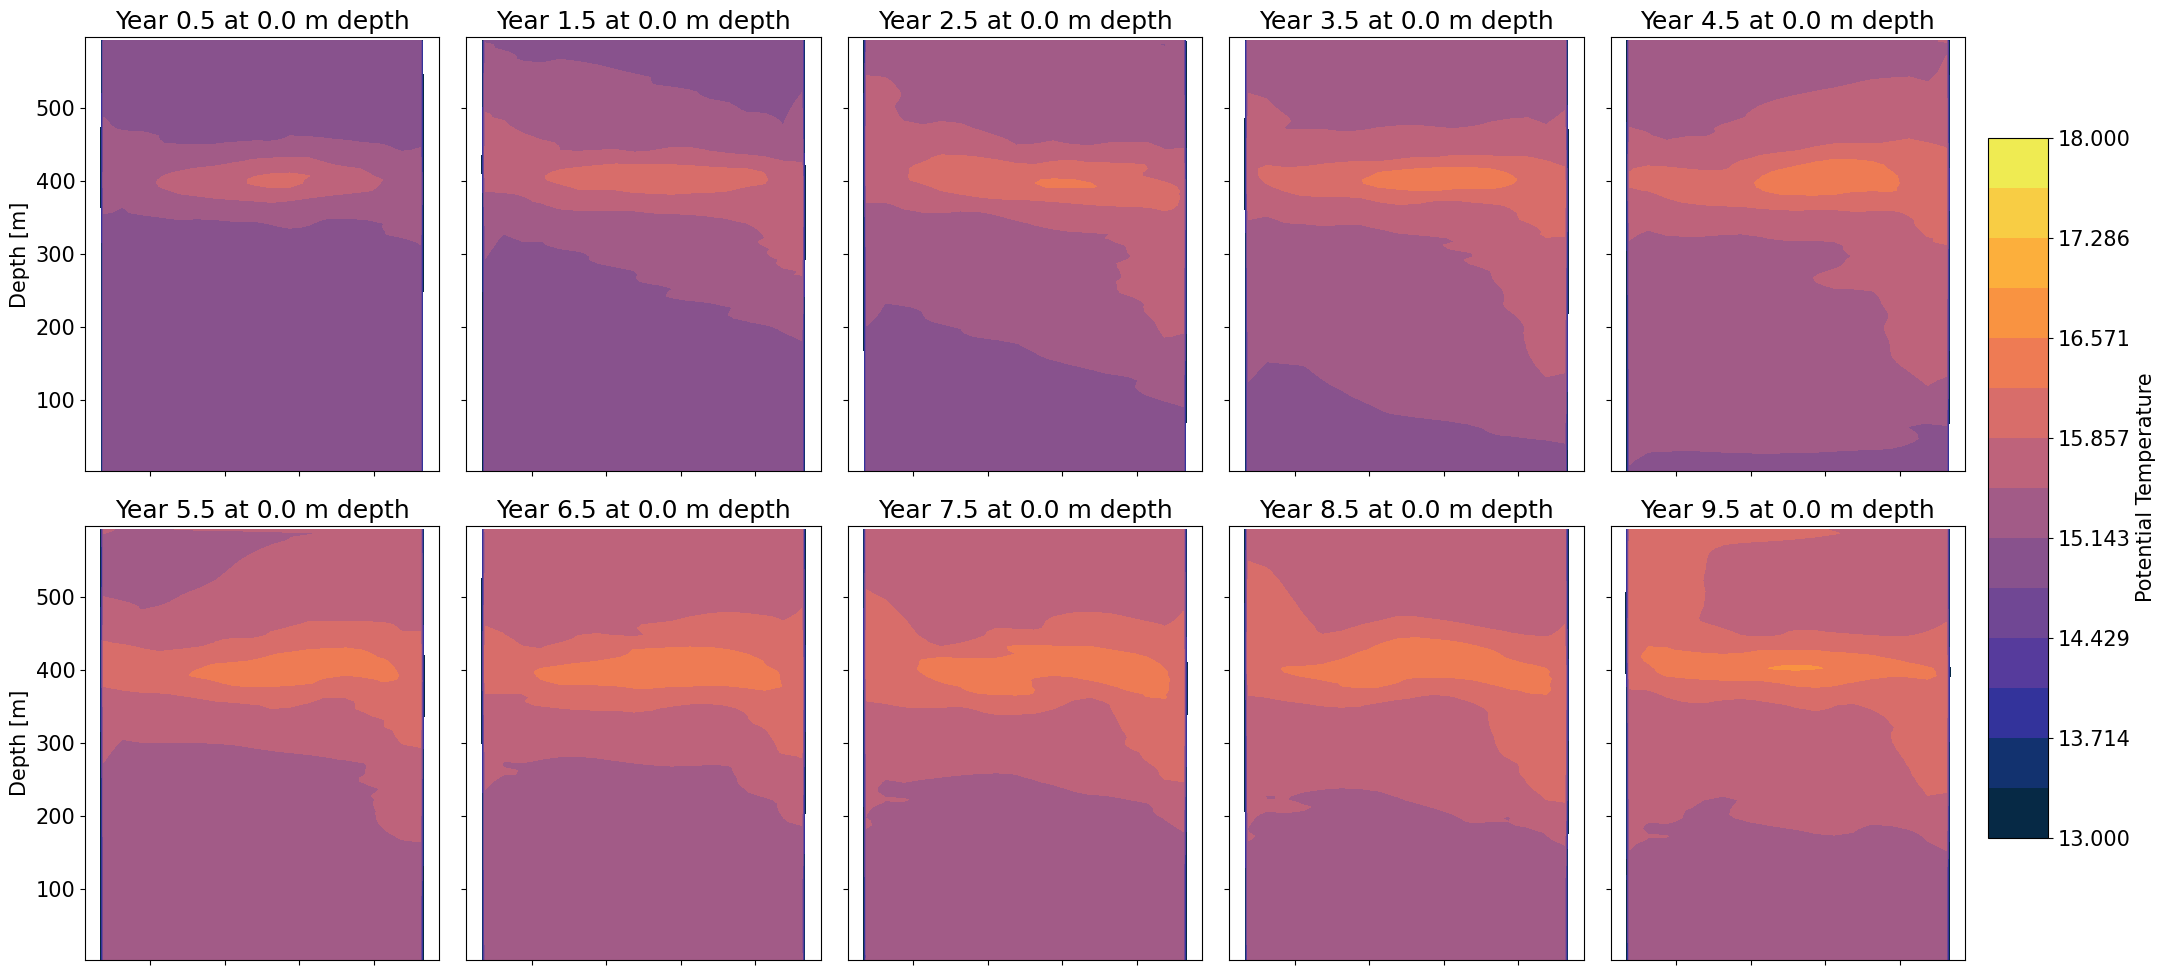

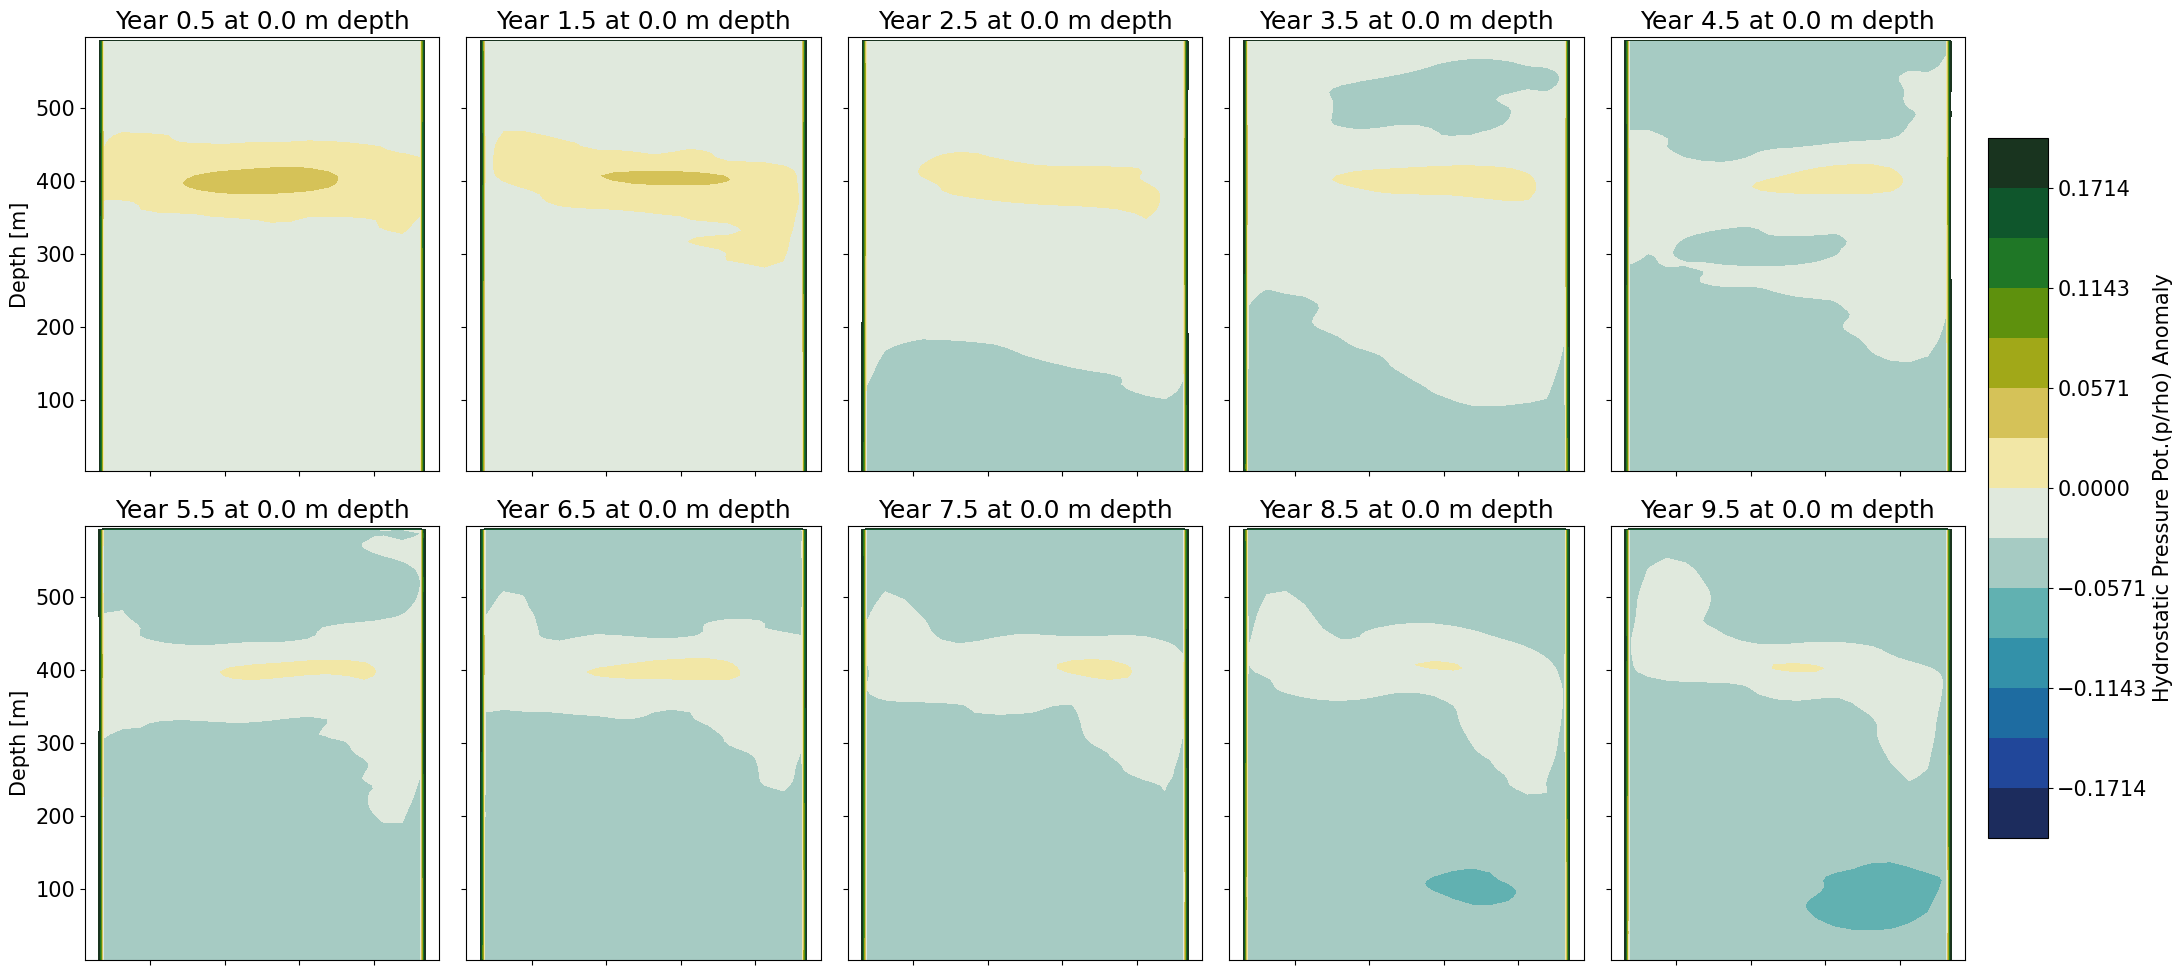

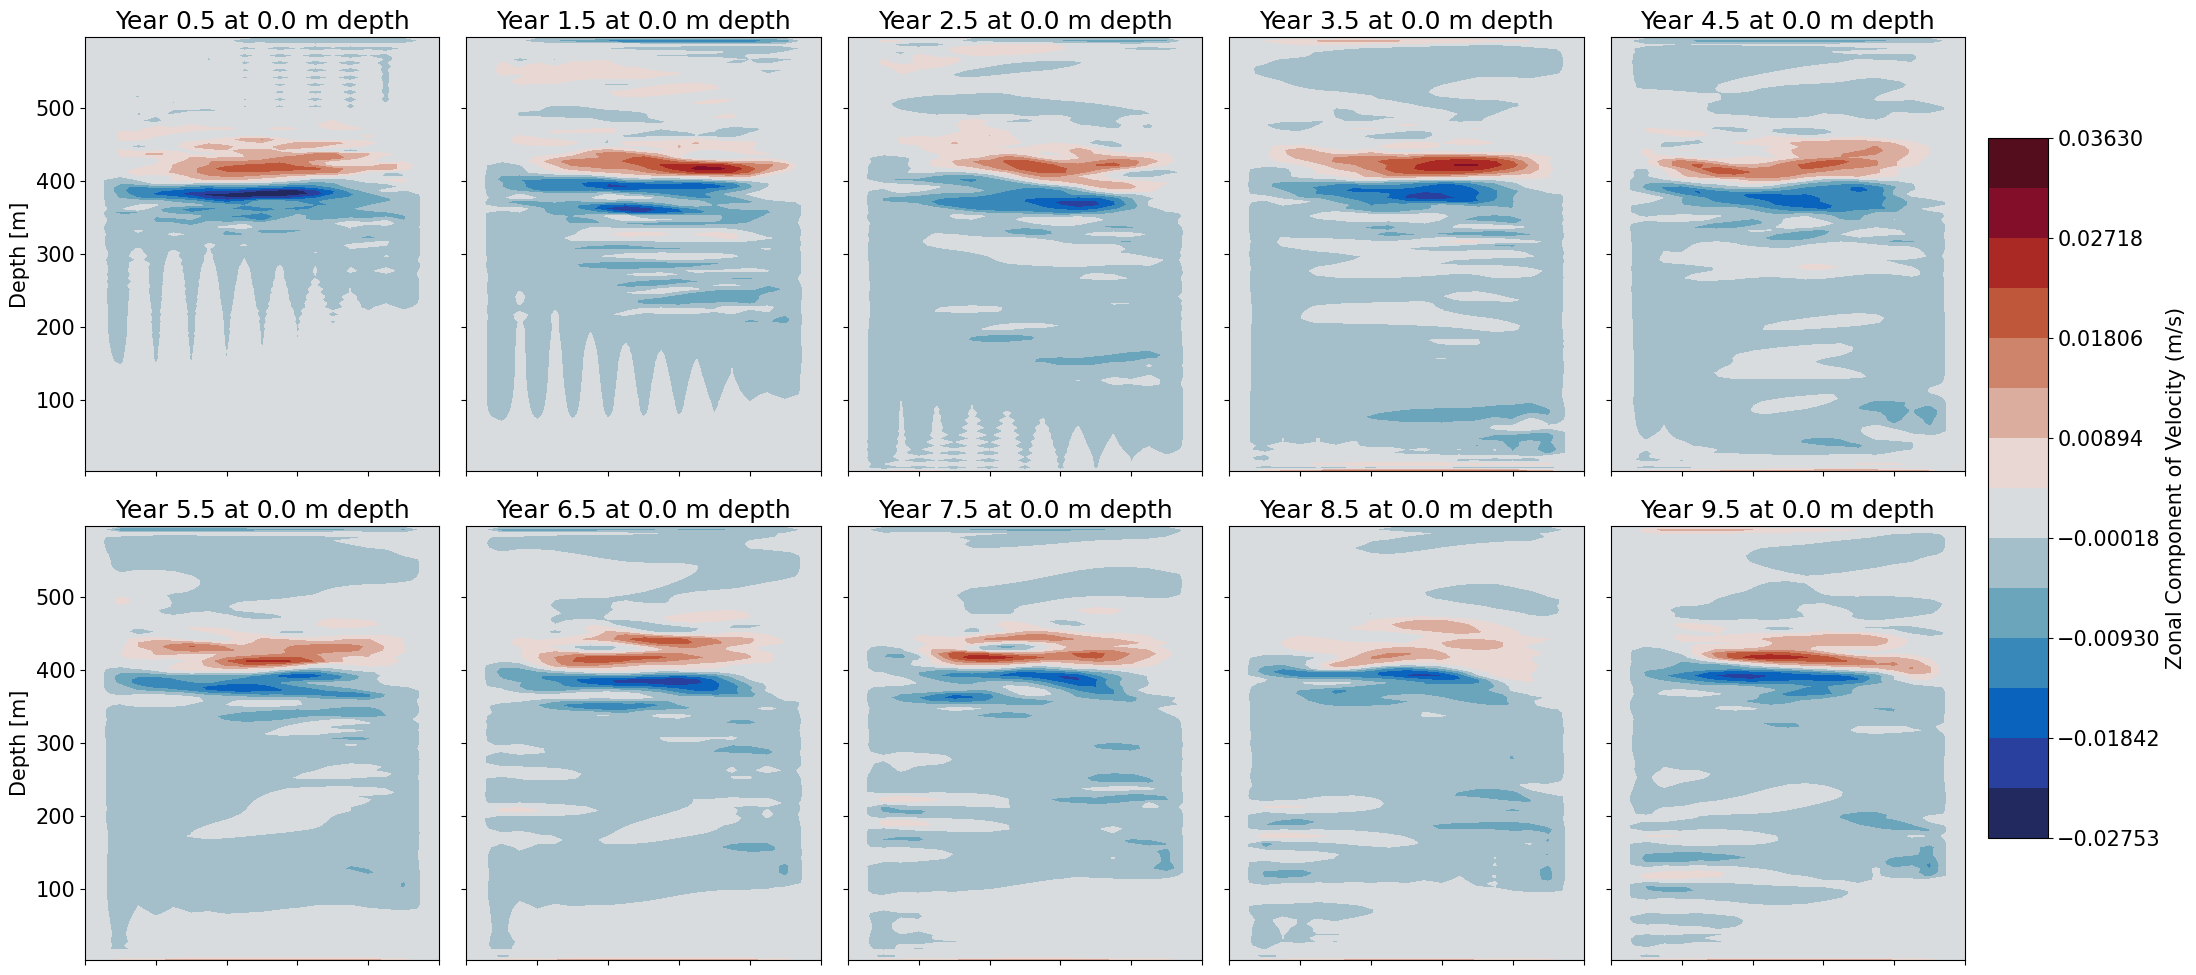

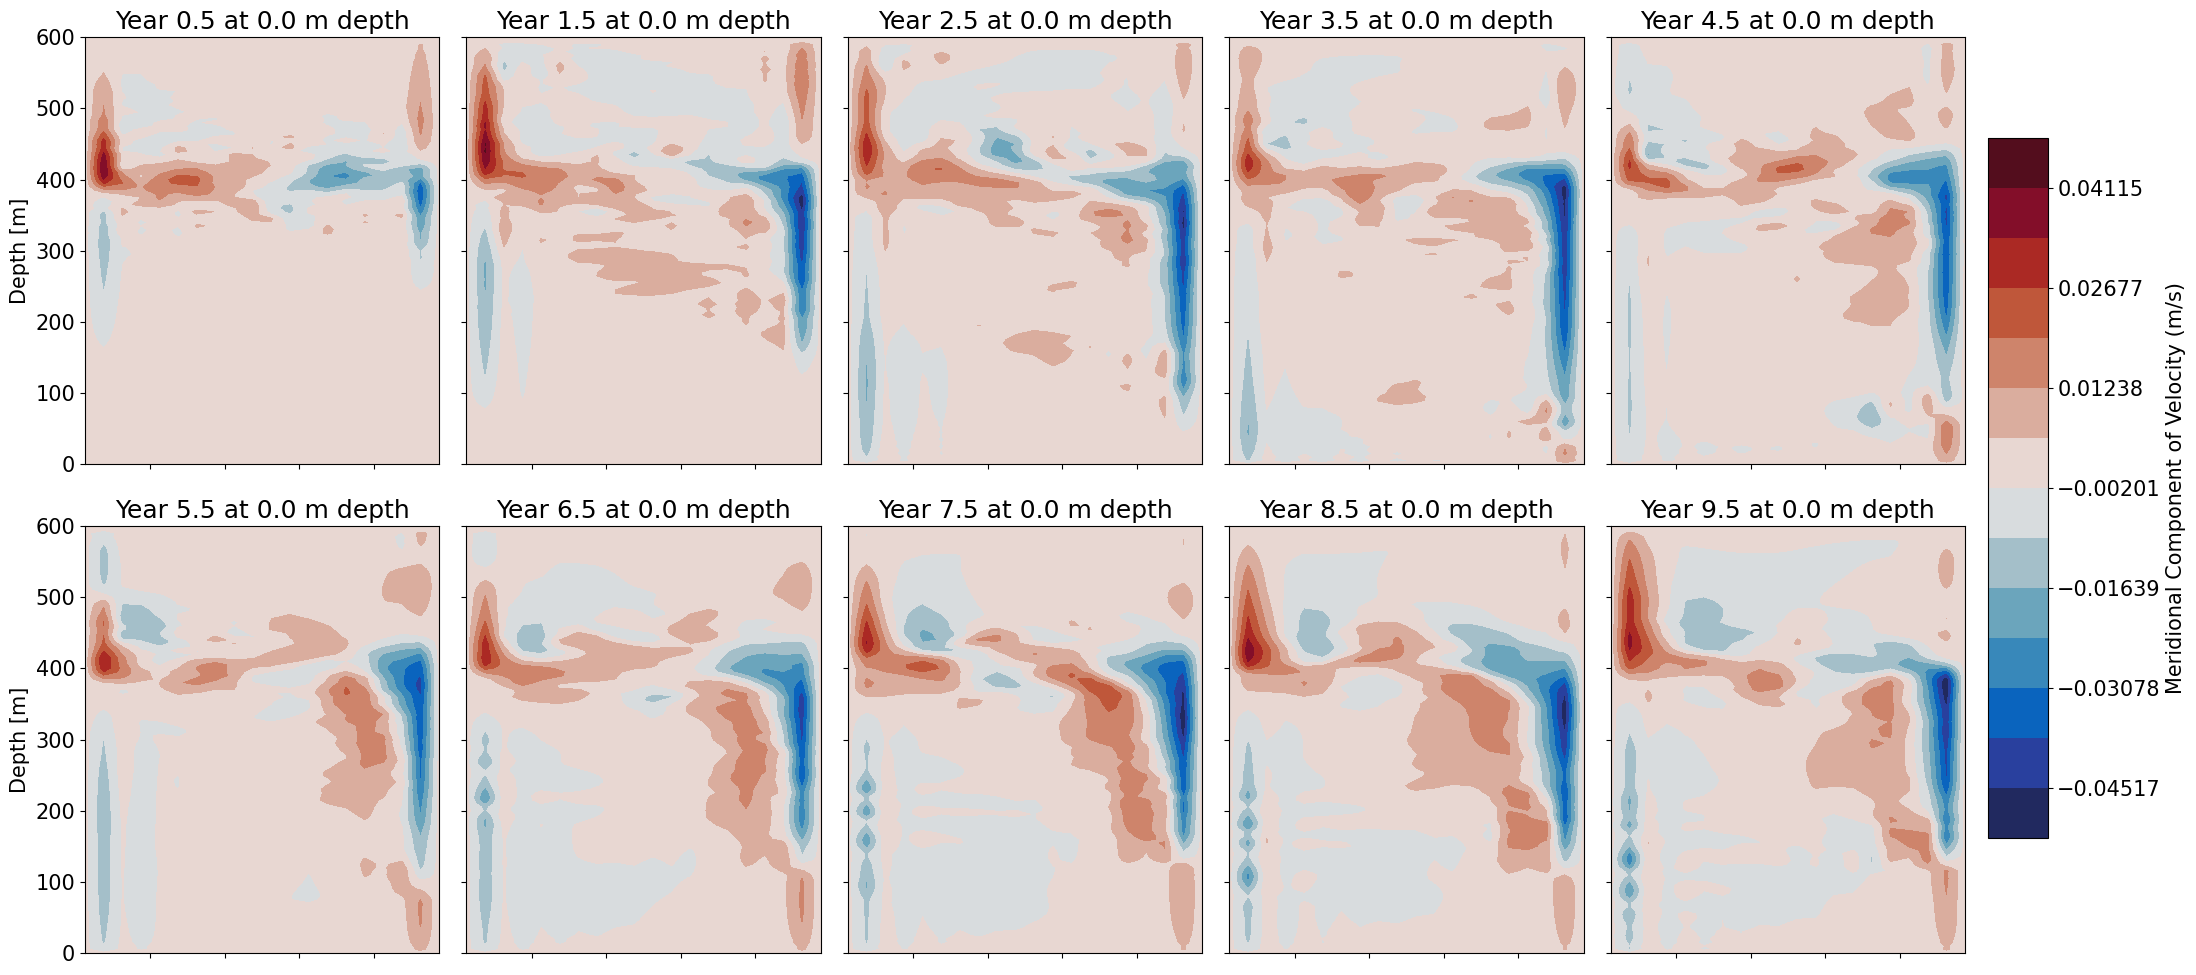

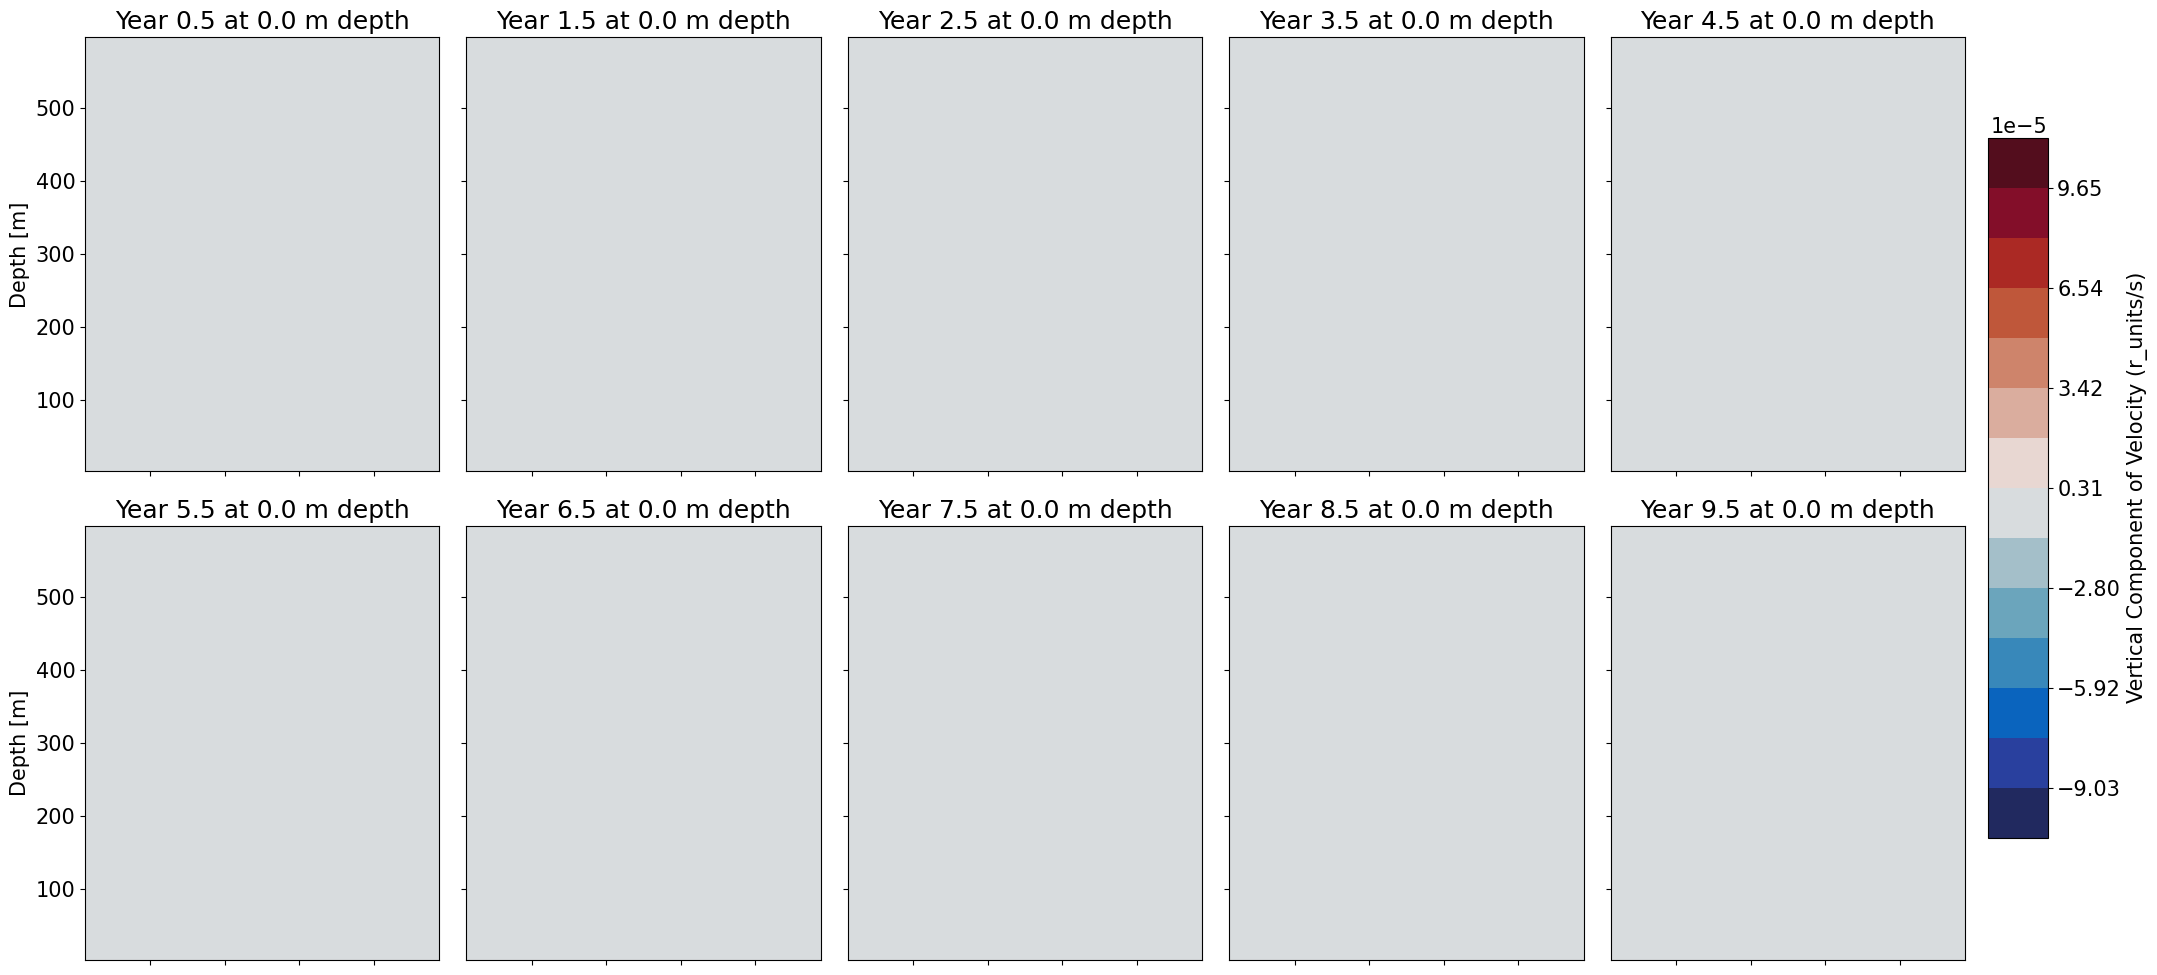

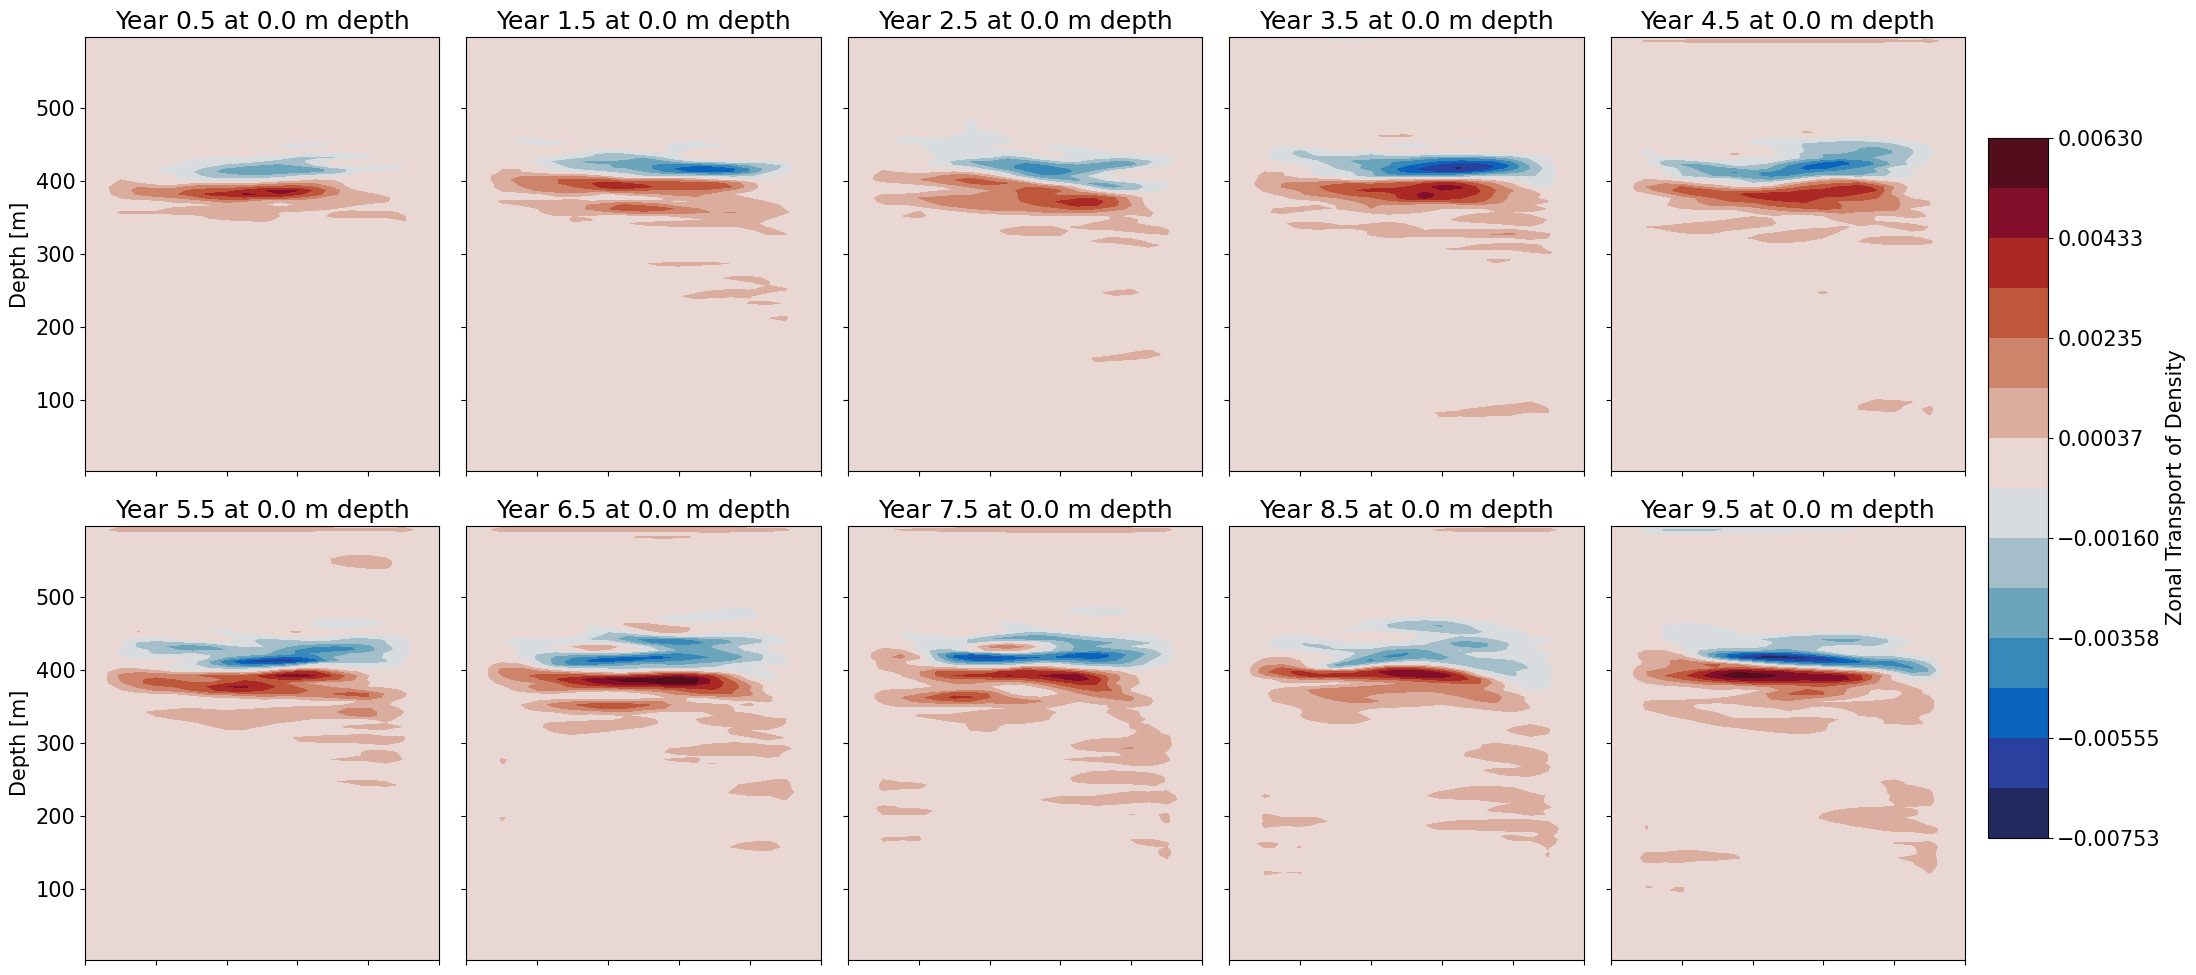

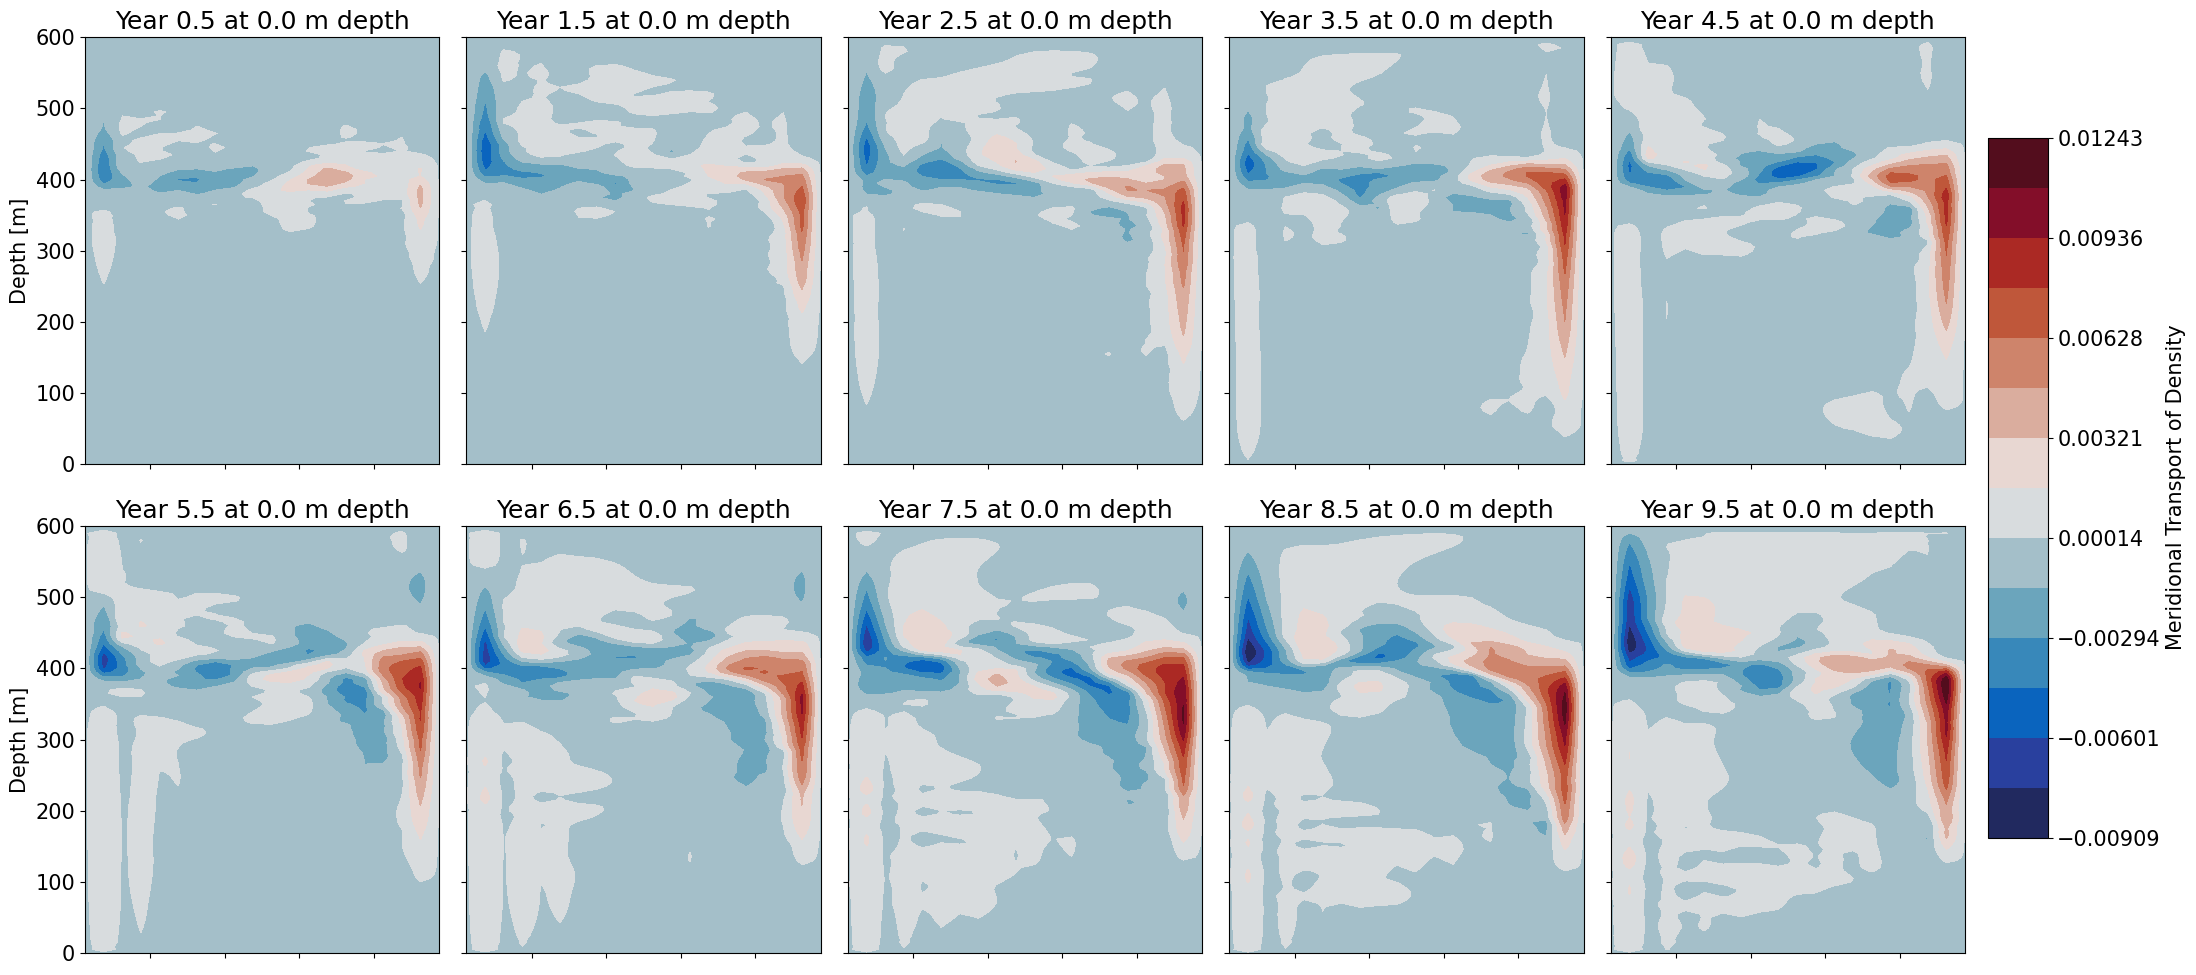

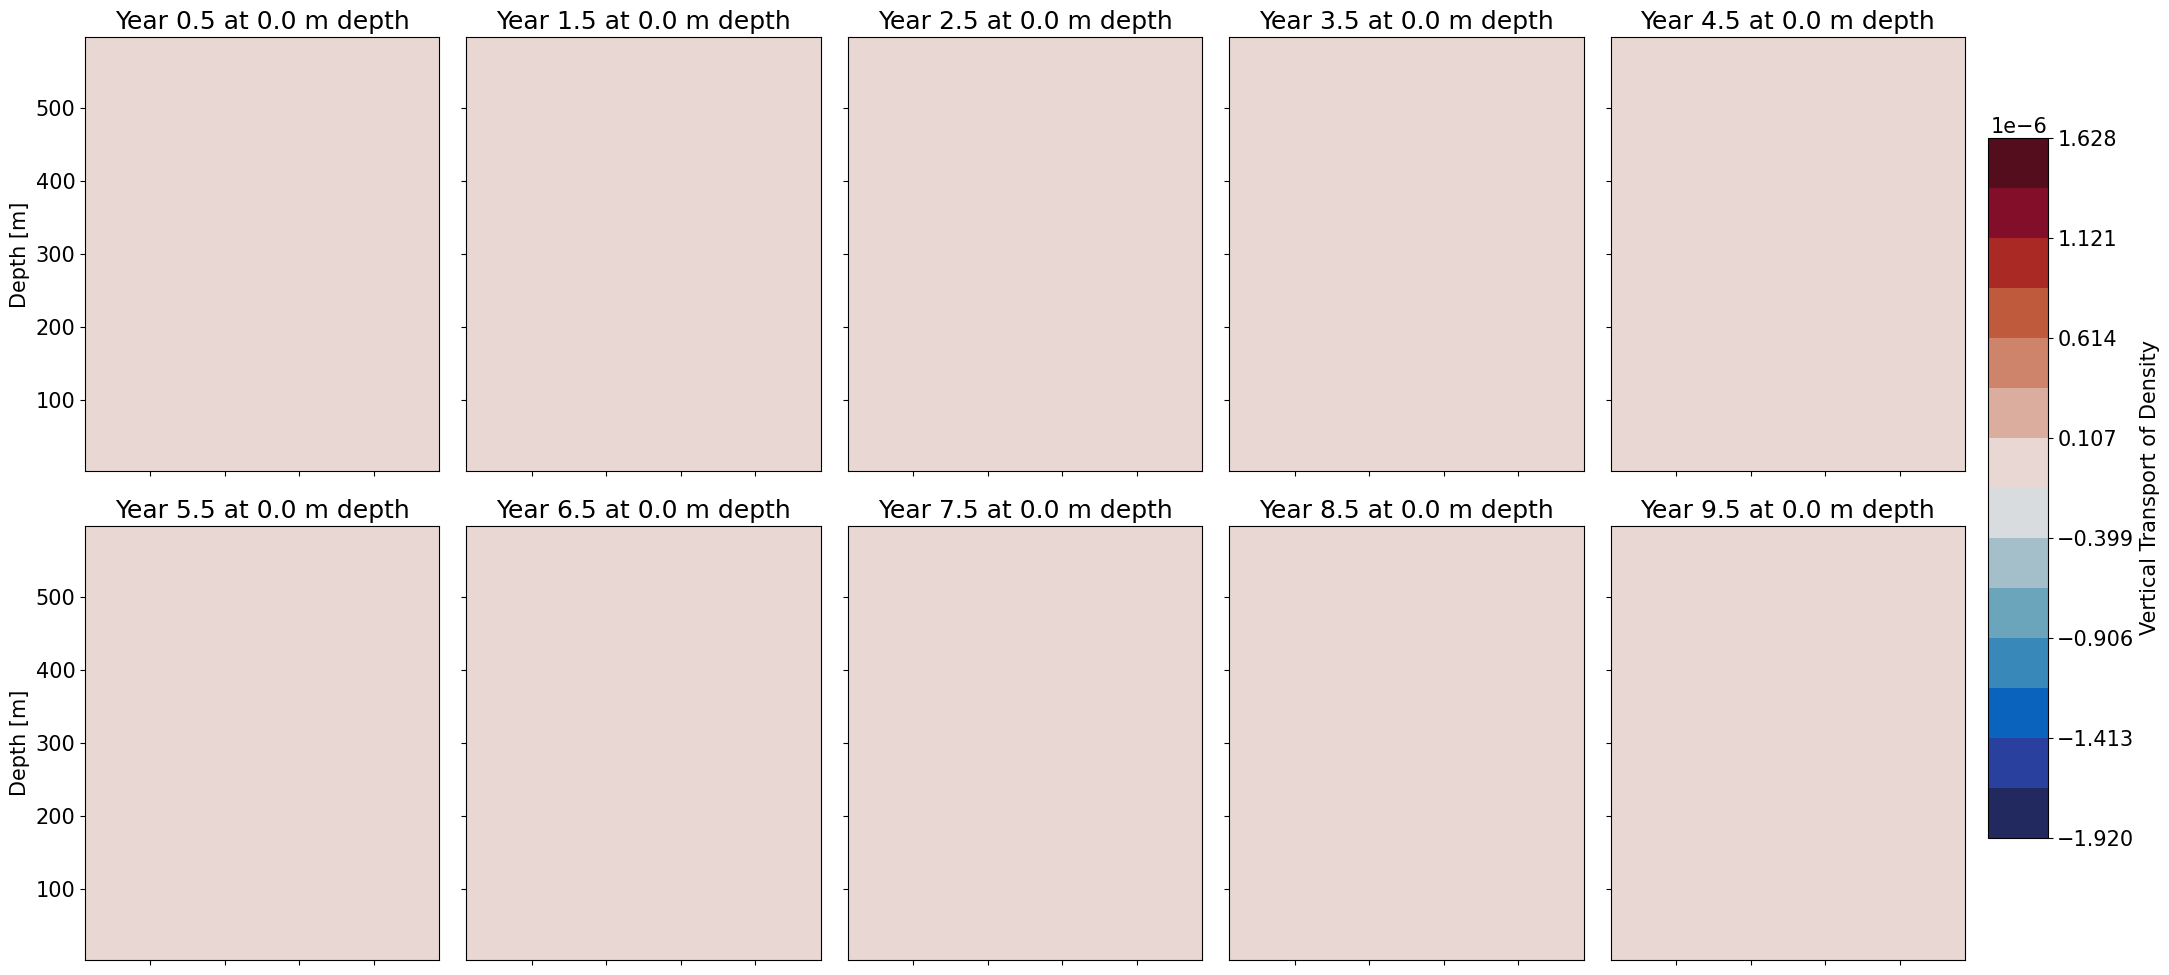

In [40]:
t=0

VARS=list(ds.keys())[2:-3]


for variable in VARS:

    exec(f'varin=ds.{variable}')
    title= varin.description 
    if variable == 'VVEL' or  variable == 'VRHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WV_VEL':
        Yin=ds.Yp1
    else:
        Yin=ds.Y
    if variable == 'UVEL' or  variable == 'URHOMASS' or  variable == 'UV_VEL_Z' or  variable == 'WU_VEL':
        Xin=ds.Xp1
    else:
        Xin=ds.X
    if variable == 'WU_VEL' or variable == 'WV_VEL' or  variable == 'WRHOMASS' or  variable == 'WVEL':
        Zin=-ds.Zld000010
        dep=0
    else:
        Zin=-ds.Zmd000010
        dep=30

    if variable == 'THETA':
        vmin=13
        vmax=18
        cmapi=cmocean.cm.thermal
    elif variable == 'PHIHYD':
        vmin=-0.2
        vmax=0.2
        cmapi=cmocean.cm.delta
    elif variable == 'WVEL' or  variable == 'WRHOMASS': 
        vmin=np.min(varin)/3
        vmax=np.max(varin)/3
        cmapi=cmocean.cm.balance
    else: 
        vmin=np.min(varin)
        vmax=np.max(varin)
        cmapi=cmocean.cm.balance

    levels=np.linspace(vmin,vmax,15)

    fig,ax=plt.subplots(2,5)

    for i in range(10):
        tin=t+(2*i)
        if i<=4:
            axin=ax[0,i]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>4,i<=9):
            axin=ax[1,i-5]
            axin.xaxis.set_tick_params(labelbottom=False)
        elif np.logical_and(i>7,i<=11):
            axin=ax[2,i-8]
            axin.set(xlabel='Distance [km]')
        if i==0 or i==10 or i==5 :
            axin.set(ylabel='Depth [m]')
        else: 
            axin.yaxis.set_tick_params(labelleft=False)


        timein=ds.T[tin]/(60*60*24)
        cax0=axin.contourf(Xin/1000, Yin/1000, varin[tin,0,:,:],levels=levels,cmap=cmapi) 
        axin.set(title=f'Year {timein/360:.1f} at {Zin[0]:.1f} m depth')
        #plt.colorbar(cax0)

    cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
    fig.colorbar(cax0, cax=cbar_ax)
    cbar_ax.set_ylabel(title)

    fig.tight_layout()

    fig.patch.set_alpha(0.0)
    plt.savefig('../Figures/' + str(project) + '/' + str(variable) +  str(dep) + 'm.png', bbox_inches='tight')

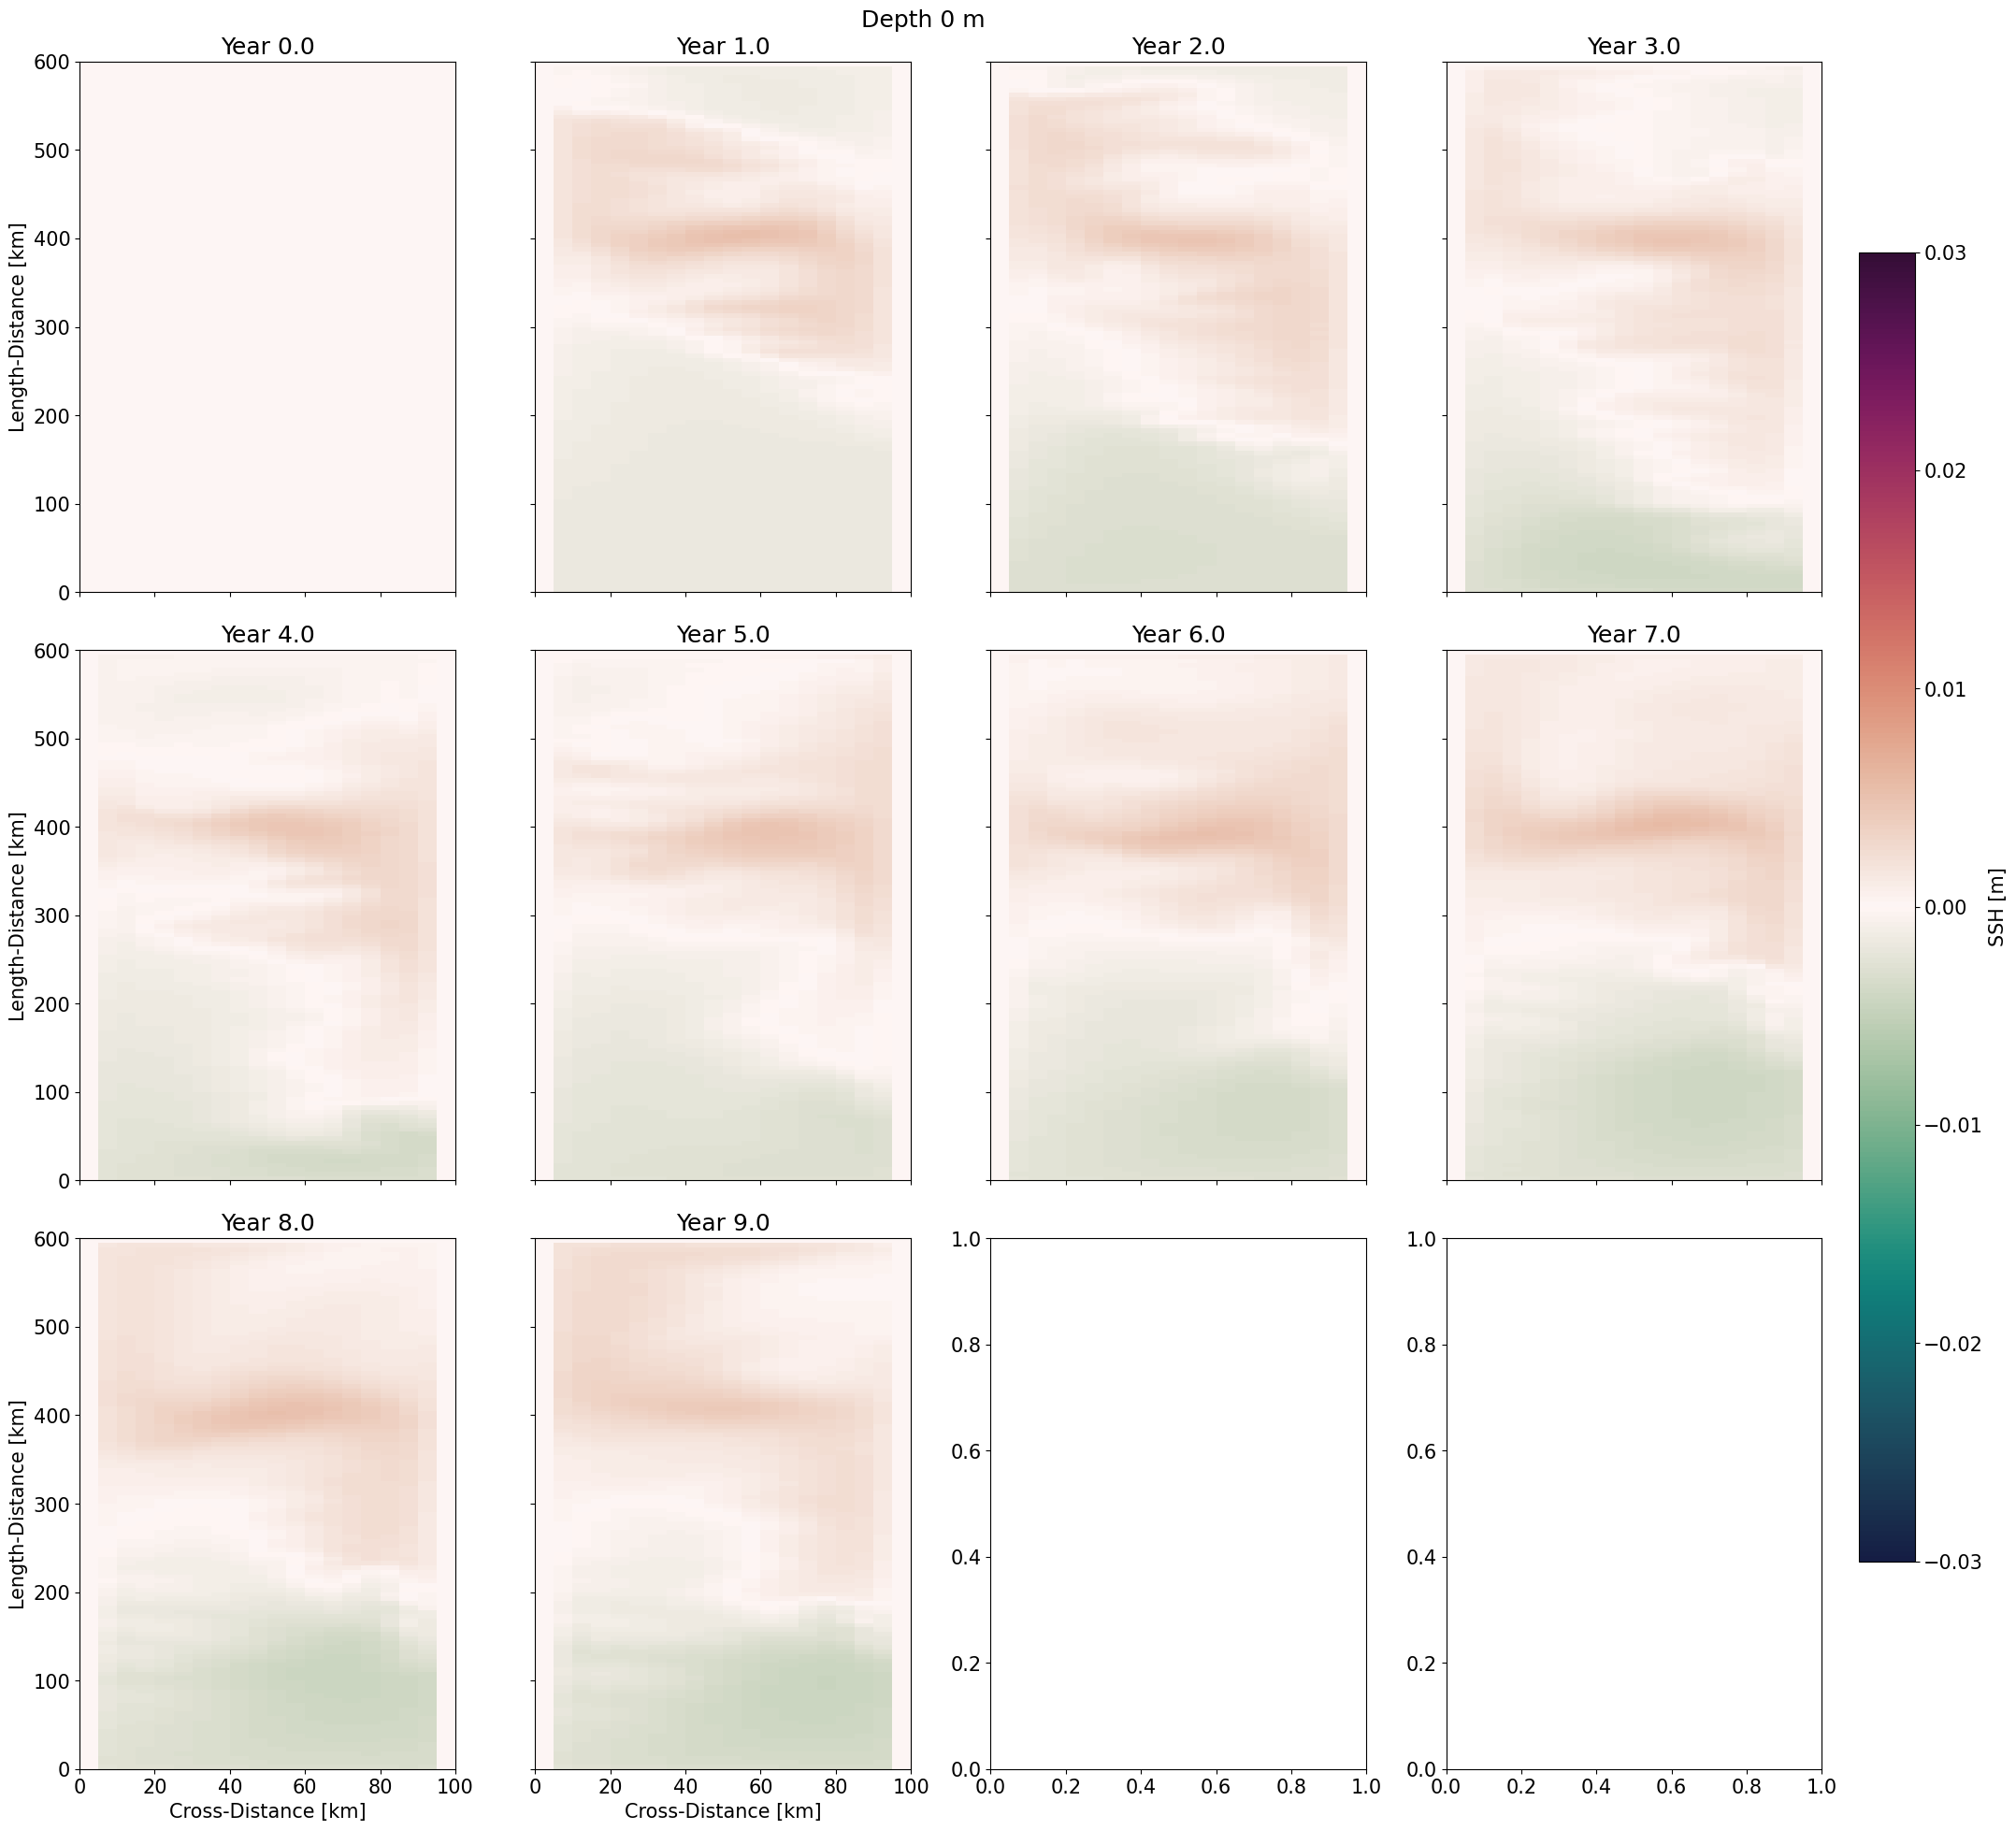

In [8]:
t=0
surf=-ds.Z[0].values

VARS=['Temp','Vvel','Uvel','Eta']
d=0
#for variable in VARS:
variable=VARS[-1]
if variable == 'Vvel':
    varin=ds.V[:,d,:,:]
    dep=surf + d*surf
    Yin=ds.Yp1
    Xin=ds.X
    vmin=-0.1
    vmax=0.1
    title= 'V-velocity [m/s]' #'Temperature [°C]'
    cmapi=cmocean.cm.balance
elif variable == 'Temp':
    varin=ds.Temp[:,d,:,:]
    title= 'Temperature [°C]'
    dep=surf + d*surf
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.thermal
    vmin=13
    vmax=19
elif variable == 'Sal':
    varin=ds.S[:,d,:,:]
    dep=surf + d*surf
    title='Salinity [g/kg]'
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.haline
    vmin=29
    vmax=33
elif variable == 'Eta':
    varin=ds.Eta
    dep=0
    title='SSH [m]'
    Yin=ds.Y
    Xin=ds.X
    cmapi=cmocean.cm.curl
    vmin=-0.03
    vmax=0.03
elif variable == 'Uvel':
    dep=surf + d*surf
    varin=ds.U[:,d,:,:]
    Yin=ds.Y
    Xin=ds.Xp1
    vmin=-0.14
    vmax=0.14
    title= 'U-velocity [m/s]' #'Temperature [°C]'


levels=np.linspace(vmin,vmax,15)

fig,ax=plt.subplots(3,4)

for i in range(10):
    tin=t+(2*i)
    if i<=3:
        axin=ax[0,i]
        axin.xaxis.set_tick_params(labelbottom=False)
    elif np.logical_and(i>3,i<=7):
        axin=ax[1,i-4]
        axin.xaxis.set_tick_params(labelbottom=False)
    elif np.logical_and(i>7,i<=11):
        axin=ax[2,i-8]
        axin.set(xlabel='Cross-Distance [km]')
    if i==0 or i==8 or i==4 :
        axin.set(ylabel='Length-Distance [km]')
    else: 
        axin.yaxis.set_tick_params(labelleft=False)


    timein=ds.T[tin]/(60*60*24)
    cax0=axin.pcolormesh( Xin/1000, Yin/1000, varin[tin],vmin=vmin,vmax=vmax,cmap=cmapi) 
    axin.set(title=f'Year {timein/360:.1f}')
    #plt.colorbar(cax0)

cbar_ax = fig.add_axes([1, 0.15, 0.03, 0.7])
fig.colorbar(cax0, cax=cbar_ax)
cbar_ax.set_ylabel(title)

fig.suptitle('Depth ' + str(dep) + ' m')
fig.tight_layout()

fig.patch.set_alpha(0.0)
plt.savefig('../Figures/' + str(project) + '/' + str(variable) +  str(dep) + 'm.png', bbox_inches='tight')

In [87]:
def animateETA(t):
    tin=t
    tt=ds.T[t].values/(60*60*24)
    print(tin)
    varin = ds.Temp[tin,:,:,10]
    

    cax.set_array(varin)
    ax.set_title(f'After {tt:.1f} hours')


In [91]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='AM'), bitrate=2000)


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
0


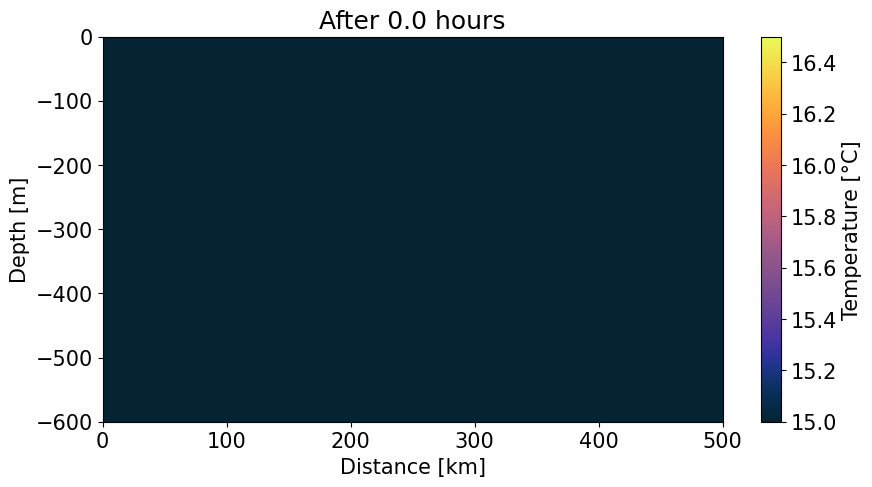

In [94]:
fig, ax = plt.subplots()
    
vmin=15
vmax=16.5
t=0
tt=ds.T[t].values/(60*60*24)
xlab='Distance [km]'
ylab='Depth [m]'
cmapi=cmocean.cm.thermal
title='Temperature [°C]'


ax.set_facecolor('wheat')
cax = ax.pcolormesh(ds.Y/1000, ds.Z,ds.Temp[t,:,:,10],cmap=cmapi,vmin=vmin,vmax=vmax)

ax.set(xlabel=xlab, ylabel=ylab)

ax.set_title(f'After {tt:.1f} hours')   
cbar = plt.colorbar(cax)
cbar.set_label(title)


anim = FuncAnimation(fig, animateETA,frames=len(ds.T), repeat=False)

anim.save('ChangeDim/Figures/Temp.mp4', writer=writer, dpi=600)